<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Contents <strong style="color:black;font-size:25px;font-family:Georgia;">of notebook <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

1. Importing Libraries
2. Exploratory Data Analysis
3. Basic Data Cleaning
4. Data Visulaization
5. Data preprocessing
5. Feature Scaling
    1. Calculating variance inflation factor
    2. Treating Multicollinearity
6. Feature Selection
7. Prediction and Detailed explantion of Linear Regression, Lasso Regression, Ridge Regression, Elastic Regression, XGBoost Regression

<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Importing <strong style="color:black;font-size:25px;font-family:Georgia;">Libraries <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Loading <strong style="color:black;font-size:25px;font-family:Georgia;">Dataset <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('CarPrice_Assignment.csv')
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  carlength  \
0          two  convertible        rwd          front       88.6      168.8   
1          two  convertible        rwd          front       88.6      168.8   
2          two    hatchback        rwd          front       94.5      171.2   
3         four        sedan        fwd          front       99.8      176.6   
4         four        sedan        4wd          front       99.4      176.6   
..         ...          ...        ...            ...        ...        ...   
200       four        sedan        rwd          front      109.1      188.8   
201       four        sedan        rwd          front      109.1      188.8   
202       four        sedan        rwd          front      109.1      188.8   
203       four        sedan        rwd          front      109.1      188.8   
204       four        sedan        rwd          front      109.1      188.8   

     carwidth  carheight  curbweight enginetype cylindernumber  enginesize  \
0        64.1       48.8        2548       dohc           four         130   
1        64.1       48.8        2548       dohc           four         130   
2        65.5       52.4        2823       ohcv            six         152   
3        66.2       54.3        2337        ohc           four         109   
4        66.4       54.3        2824        ohc           five         136   
..        ...        ...         ...        ...            ...         ...   
200      68.9       55.5        2952        ohc           four         141   
201      68.8       55.5        3049        ohc           four         141   
202      68.9       55.5        3012       ohcv            six         173   
203      68.9       55.5        3217        ohc            six         145   
204      68.9       55.5        3062        ohc           four         141   

    fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         mpfi       3.47    2.68               9.0         111     5000   
1         mpfi       3.47    2.68               9.0         111     5000   
2         mpfi       2.68    3.47               9.0         154     5000   
3         mpfi       3.19    3.40              10.0         102     5500   
4         mpfi       3.19    3.40               8.0         115     5500   
..         ...        ...     ...               ...         ...      ...   
200       mpfi       3.78    3.15               9.5         114     5400   
201       mpfi       3.78    3.15               8.7         160     5300   
202       mpfi       3.58    2.87               8.8         134     5500   
203        idi       3.01    3.40              23.0         106     4800   
204       mpfi       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
200       23          28  16845.0  
201       19          25  19045.0  
202       18     

<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Exploratory <strong style="color:black;font-size:25px;font-family:Georgia;">Data Analysis (EDA)<strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

In [3]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [4]:
df.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
200   sedan        rwd          front      109.1      188.8      68.9   
201   sedan        rwd          front      109.1      188.8      68.8   
202   sedan        rwd          front      109.1      188.8      68.9   
203   sedan        rwd          front      109.1      188.8      68.9   
204   sedan        rwd          front      109.1      188.8      68.9   

     carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
200       55.5        2952        ohc           four         141       mpfi   
201       55.5        3049        ohc           four         141       mpfi   
202       55.5        3012       ohcv            six         173       mpfi   
203       55.5        3217        ohc            six         145        idi   
204       55.5        3062        ohc           four         141       mpfi   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
200       3.78    3.15               9.5         114     5400       23   
201       3.78    3.15               8.7         160     5300       19   
202       3.58    2.87               8.8         134     5500       18   
203       3.01    3.40              23.0         106     4800       26   
204       3.78    3.15               9.5         114     5400       19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0

In [5]:
df.shape

(205, 26)

In [6]:
df.size

5330

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [11]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [14]:
df.corr()

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Basic <strong style="color:black;font-size:25px;font-family:Georgia;">Data Cleaning <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

### Lets us remove Car_Id column since it is not useful

In [15]:
df.drop(['car_ID','CarName'],axis = 1,inplace = True)
df

symboling fueltype aspiration doornumber      carbody drivewheel  \
0            3      gas        std        two  convertible        rwd   
1            3      gas        std        two  convertible        rwd   
2            1      gas        std        two    hatchback        rwd   
3            2      gas        std       four        sedan        fwd   
4            2      gas        std       four        sedan        4wd   
..         ...      ...        ...        ...          ...        ...   
200         -1      gas        std       four        sedan        rwd   
201         -1      gas      turbo       four        sedan        rwd   
202         -1      gas        std       four        sedan        rwd   
203         -1   diesel      turbo       four        sedan        rwd   
204         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0            front       88.6      168.8      64.1       48.8        2548   
1            front       88.6      168.8      64.1       48.8        2548   
2            front       94.5      171.2      65.5       52.4        2823   
3            front       99.8      176.6      66.2       54.3        2337   
4            front       99.4      176.6      66.4       54.3        2824   
..             ...        ...        ...       ...        ...         ...   
200          front      109.1      188.8      68.9       55.5        2952   
201          front      109.1      188.8      68.8       55.5        3049   
202          front      109.1      188.8      68.9       55.5        3012   
203          front      109.1      188.8      68.9       55.5        3217   
204          front      109.1      188.8      68.9       55.5        3062   

    enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0         dohc           four         130       mpfi       3.47    2.68   
1         dohc           four         130       mpfi       3.47    2.68   
2         ohcv            six         152       mpfi       2.68    3.47   
3          ohc           four         109       mpfi       3.19    3.40   
4          ohc           five         136       mpfi       3.19    3.40   
..         ...            ...         ...        ...        ...     ...   
200        ohc           four         141       mpfi       3.78    3.15   
201        ohc           four         141       mpfi       3.78    3.15   
202       ohcv            six         173       mpfi       3.58    2.87   
203        ohc            six         145        idi       3.01    3.40   
204        ohc           four         141       mpfi       3.78    3.15   

     compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0                 9.0         111     5000       21          27  13495.0  
1                 9.0         111     5000       21          27  16500.0  
2                 9.0         154     5000       19          26  16500.0  
3                10.0         102     5500       24          30  13950.0  
4                 8.0         115     5500       18          22  17450.0  
..                ...         ...      ...      ...         ...      ...  
200               9.5         114     5400       23          28  16845.0  
201               8.7         160     5300       19          25  19045.0  
202               8.8         134     5500       18          23  21485.0  
203              23.0         106     4800       26          27  22470.0  
204               9.5         114     5400       19          25  22625.0  

[205 rows x 24 columns]

<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Data <strong style="color:black;font-size:25px;font-family:Georgia;">Visualization <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

#### First I will store all categorical columns in one list and all numerical,float columns in another list

In [16]:
cat = ['symboling','fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation','enginetype','cylindernumber','fuelsystem']
print('No. of categorical columns are:',len(cat))

No. of categorical columns are: 10


In [17]:
num = []
for i in df.columns:
    if i not in cat:
        num.append(i)
print('No. of numerical/float columns are:',len(num))

No. of numerical/float columns are: 14


## Exploring Categorical Columns/Features

In [18]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

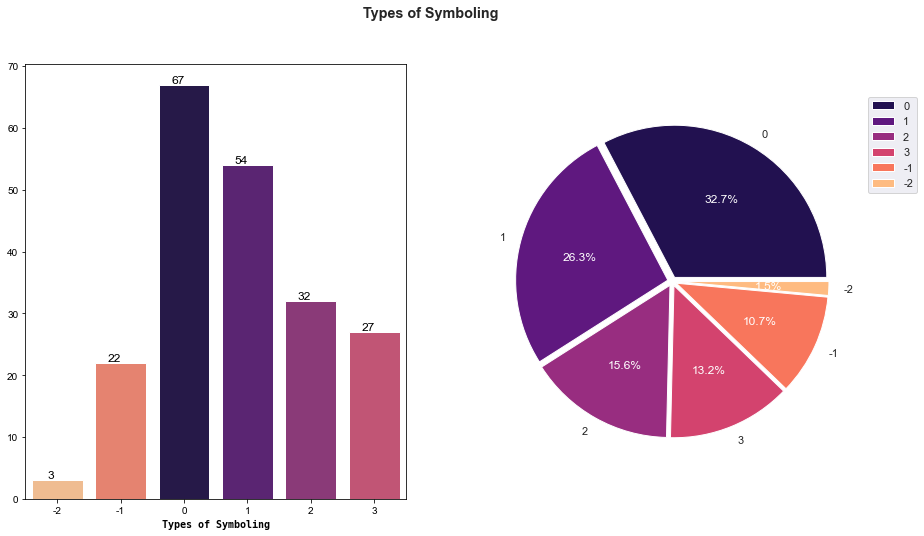

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['symboling'].value_counts().index
y=df['symboling'].value_counts().values.tolist()
data = df.groupby("symboling").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of Symboling', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['symboling'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of Symboling',weight = 'bold')
plt.show()

In [20]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

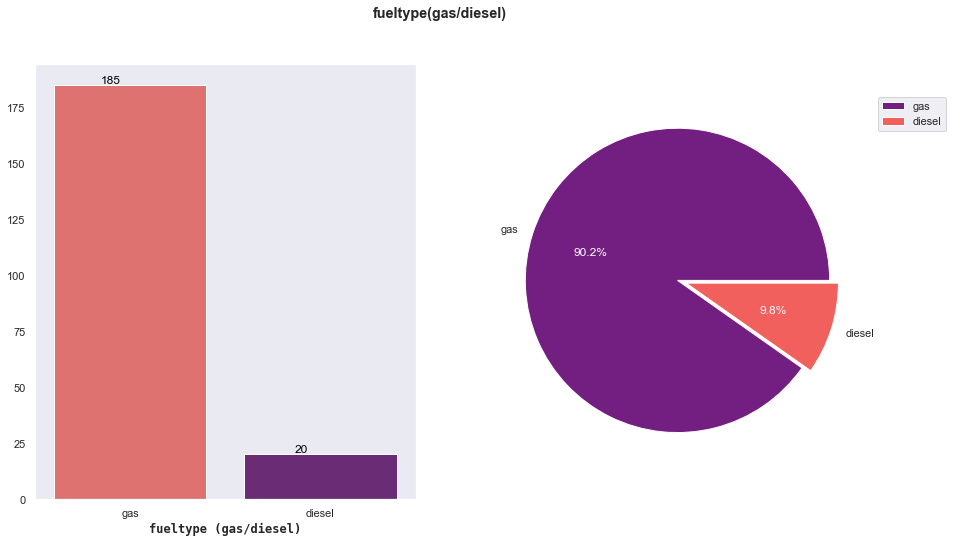

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['fueltype'].value_counts().index
y=df['fueltype'].value_counts().values.tolist()
data = df.groupby("fueltype").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('fueltype (gas/diesel)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['fueltype'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('fueltype(gas/diesel)',weight = 'bold')
plt.show()

#### Observation:
Most of the people are using gas as fuel for their cars

In [22]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

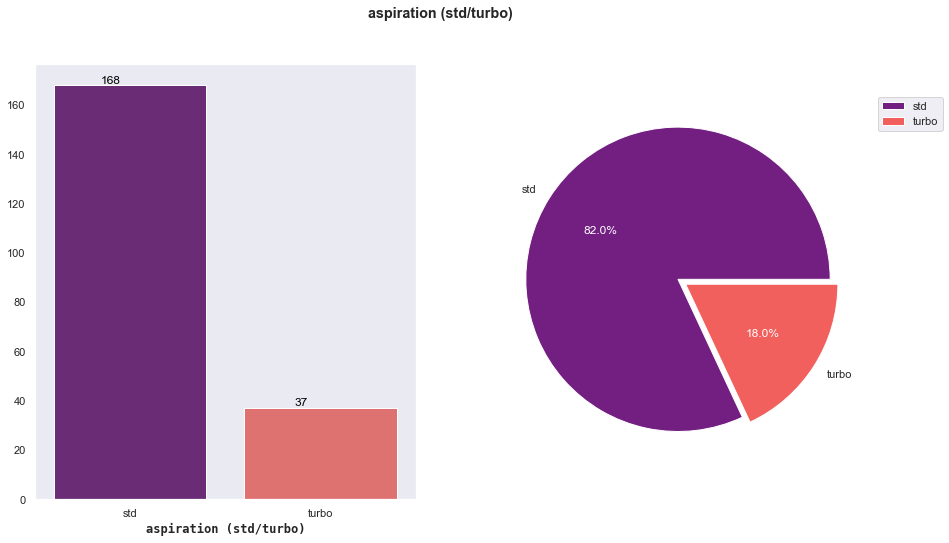

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['aspiration'].value_counts().index
y=df['aspiration'].value_counts().values.tolist()
data = df.groupby("aspiration").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('aspiration (std/turbo)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['aspiration'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('aspiration (std/turbo)',weight = 'bold')
plt.show()

In [24]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

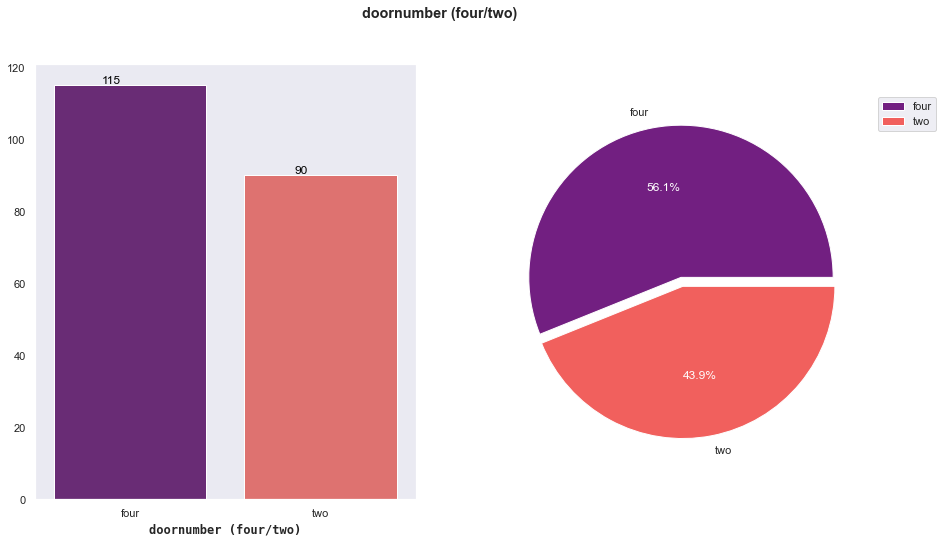

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['doornumber'].value_counts().index
y=df['doornumber'].value_counts().values.tolist()
data = df.groupby("doornumber").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('doornumber (four/two)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['doornumber'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('doornumber (four/two)',weight = 'bold')
plt.show()

In [26]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

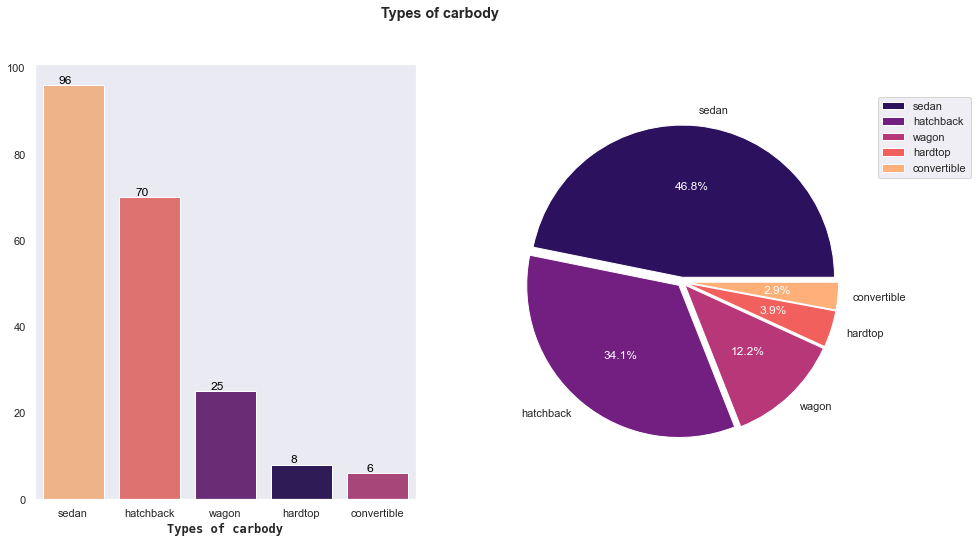

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['carbody'].value_counts().index
y=df['carbody'].value_counts().values.tolist()
data = df.groupby("carbody").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of carbody', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['carbody'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of carbody',weight = 'bold')
plt.show()

In [28]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

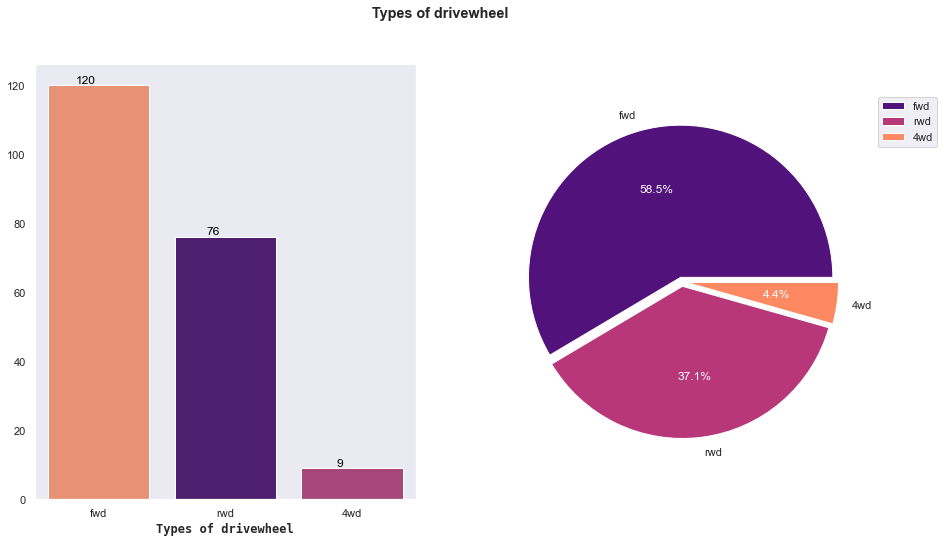

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['drivewheel'].value_counts().index
y=df['drivewheel'].value_counts().values.tolist()
data = df.groupby("drivewheel").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of drivewheel', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['drivewheel'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of drivewheel',weight = 'bold')
plt.show()

In [30]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

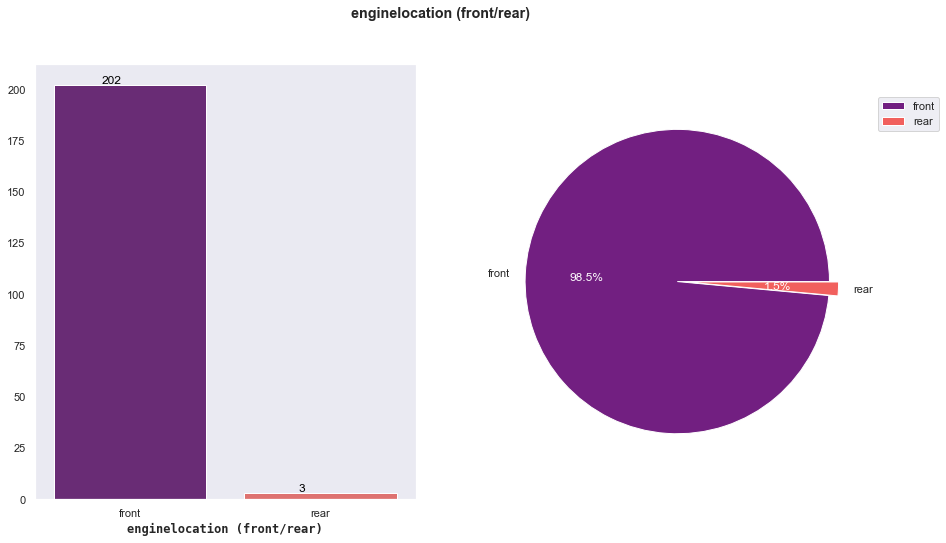

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['enginelocation'].value_counts().index
y=df['enginelocation'].value_counts().values.tolist()
data = df.groupby("enginelocation").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('enginelocation (front/rear)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['enginelocation'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('enginelocation (front/rear)',weight = 'bold')
plt.show()

In [32]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

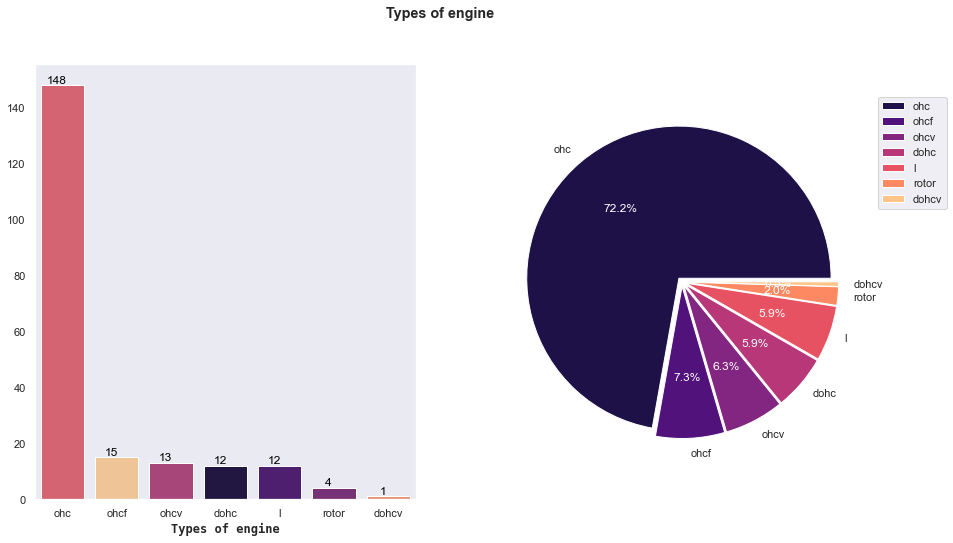

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['enginetype'].value_counts().index
y=df['enginetype'].value_counts().values.tolist()
data = df.groupby("enginetype").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of engine', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['enginetype'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of engine',weight = 'bold')
plt.show()

In [34]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

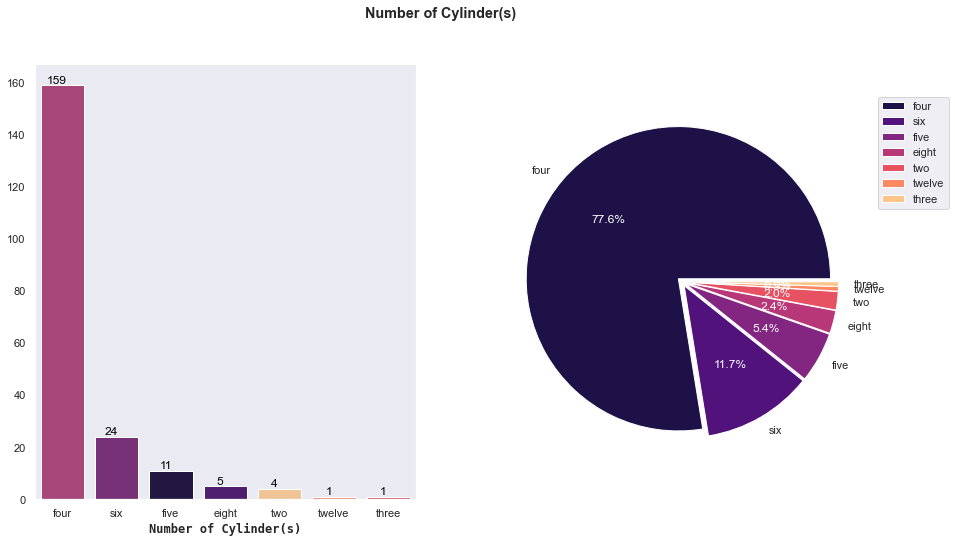

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['cylindernumber'].value_counts().index
y=df['cylindernumber'].value_counts().values.tolist()
data = df.groupby("cylindernumber").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Number of Cylinder(s)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['cylindernumber'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Number of Cylinder(s)',weight = 'bold')
plt.show()

In [36]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

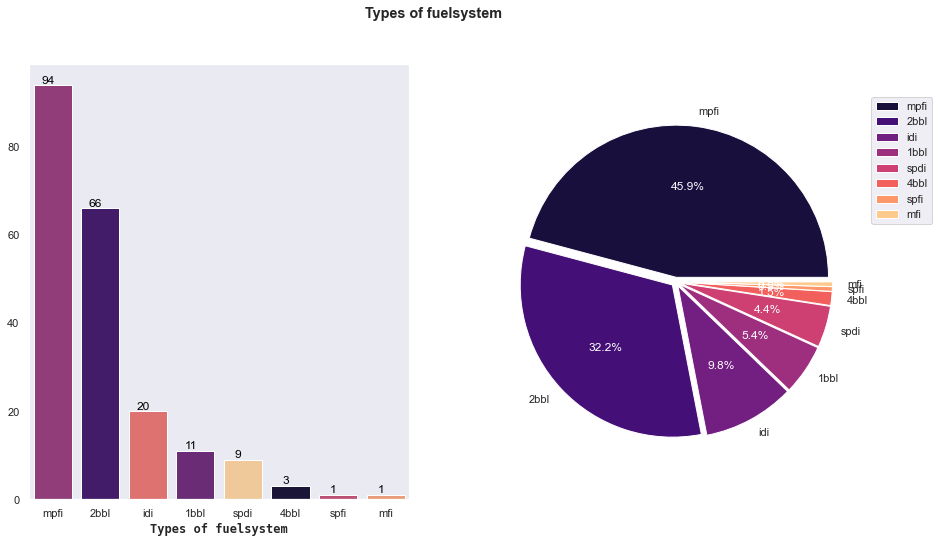

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['fuelsystem'].value_counts().index
y=df['fuelsystem'].value_counts().values.tolist()
data = df.groupby("fuelsystem").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Types of fuelsystem', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['fuelsystem'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Types of fuelsystem',weight = 'bold')
plt.show()

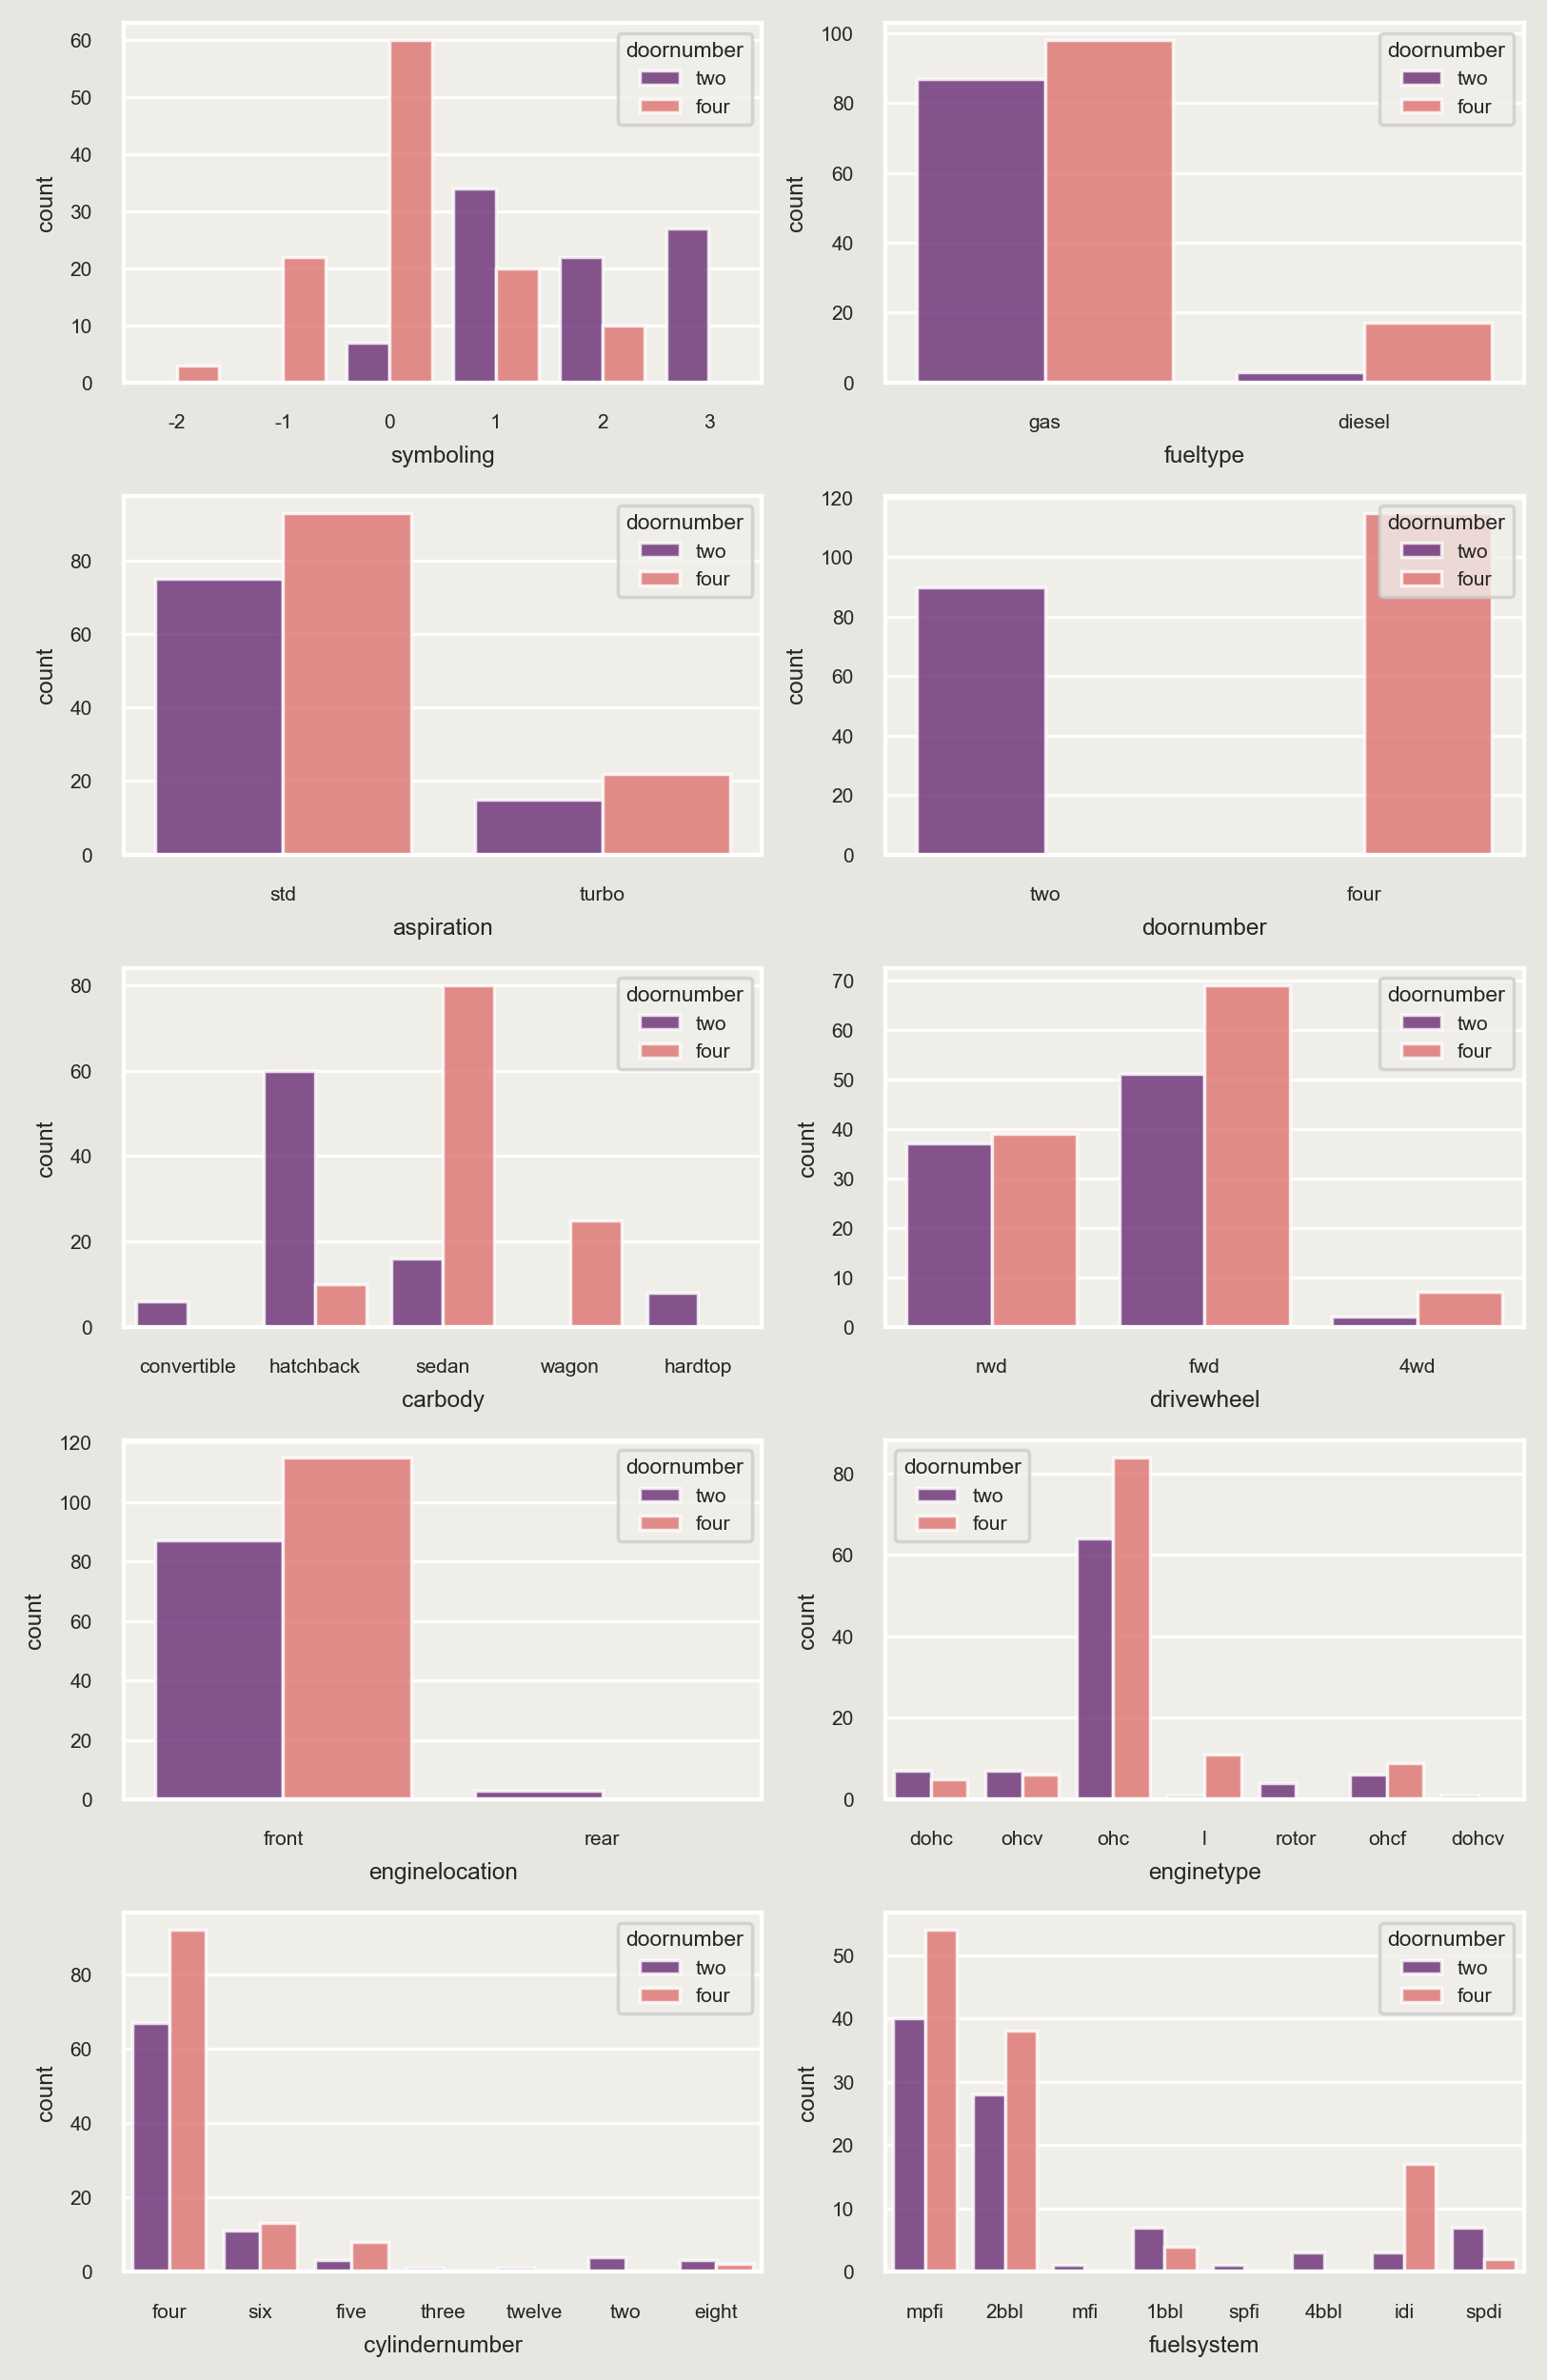

In [38]:
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 7, 
                    'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#e8e6e1'}, font_scale = 0.55)

fig, ax = plt.subplots(5, 2, figsize = (6.5, 10))

for indx, (column, axes) in list(enumerate(list(zip(cat, 
                                                    ax.flatten())))):
    
    sns.countplot(ax = axes, x = df[column], hue = df['doornumber'], 
                  palette = 'magma', alpha = 0.8)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
axes_legend = ax.flatten()

axes_legend[1].legend(title = 'doornumber', loc = 'upper right')
axes_legend[2].legend(title = 'doornumber', loc = 'upper right')

plt.tight_layout()
plt.show()

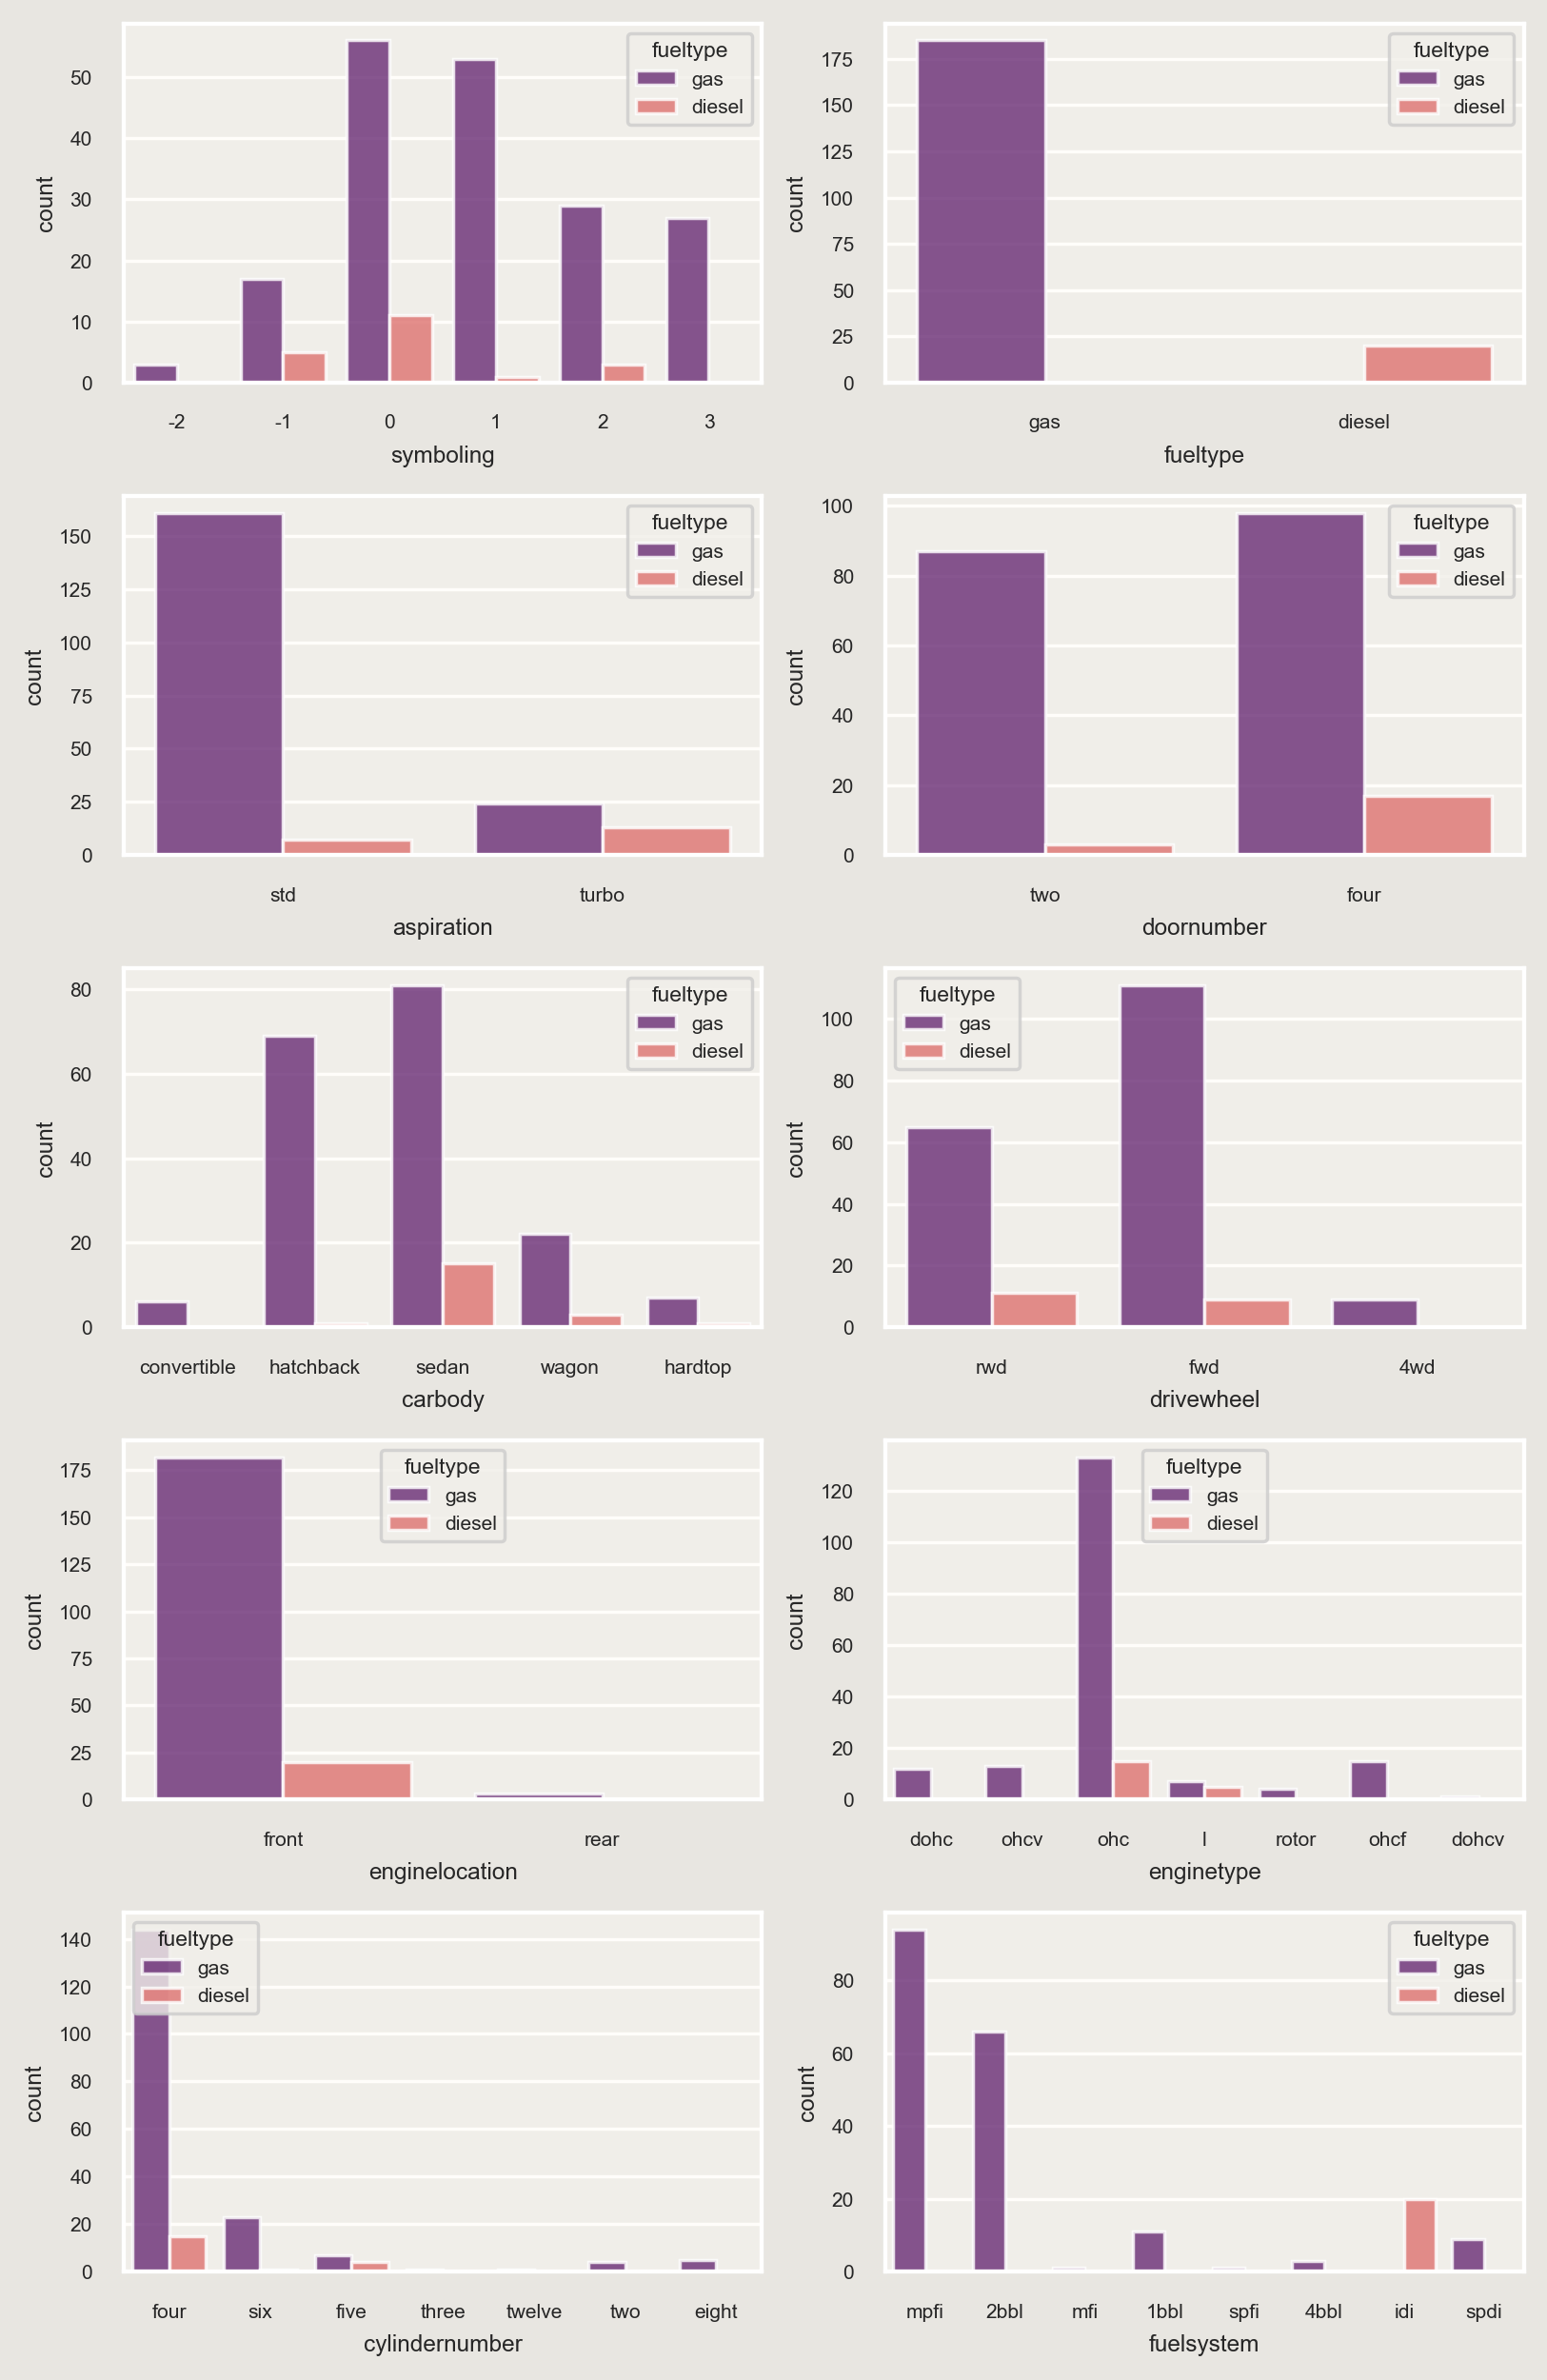

In [39]:
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 7, 
                    'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#e8e6e1'}, font_scale = 0.55)

fig, ax = plt.subplots(5, 2, figsize = (6.5, 10))

for indx, (column, axes) in list(enumerate(list(zip(cat, 
                                                    ax.flatten())))):
    
    sns.countplot(ax = axes, x = df[column], hue = df['fueltype'], 
                  palette = 'magma', alpha = 0.8)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
axes_legend = ax.flatten()

axes_legend[1].legend(title = 'fueltype', loc = 'upper right')
axes_legend[2].legend(title = 'fueltype', loc = 'upper right')

plt.tight_layout()
plt.show()

## Exploring Numerical/Float variables

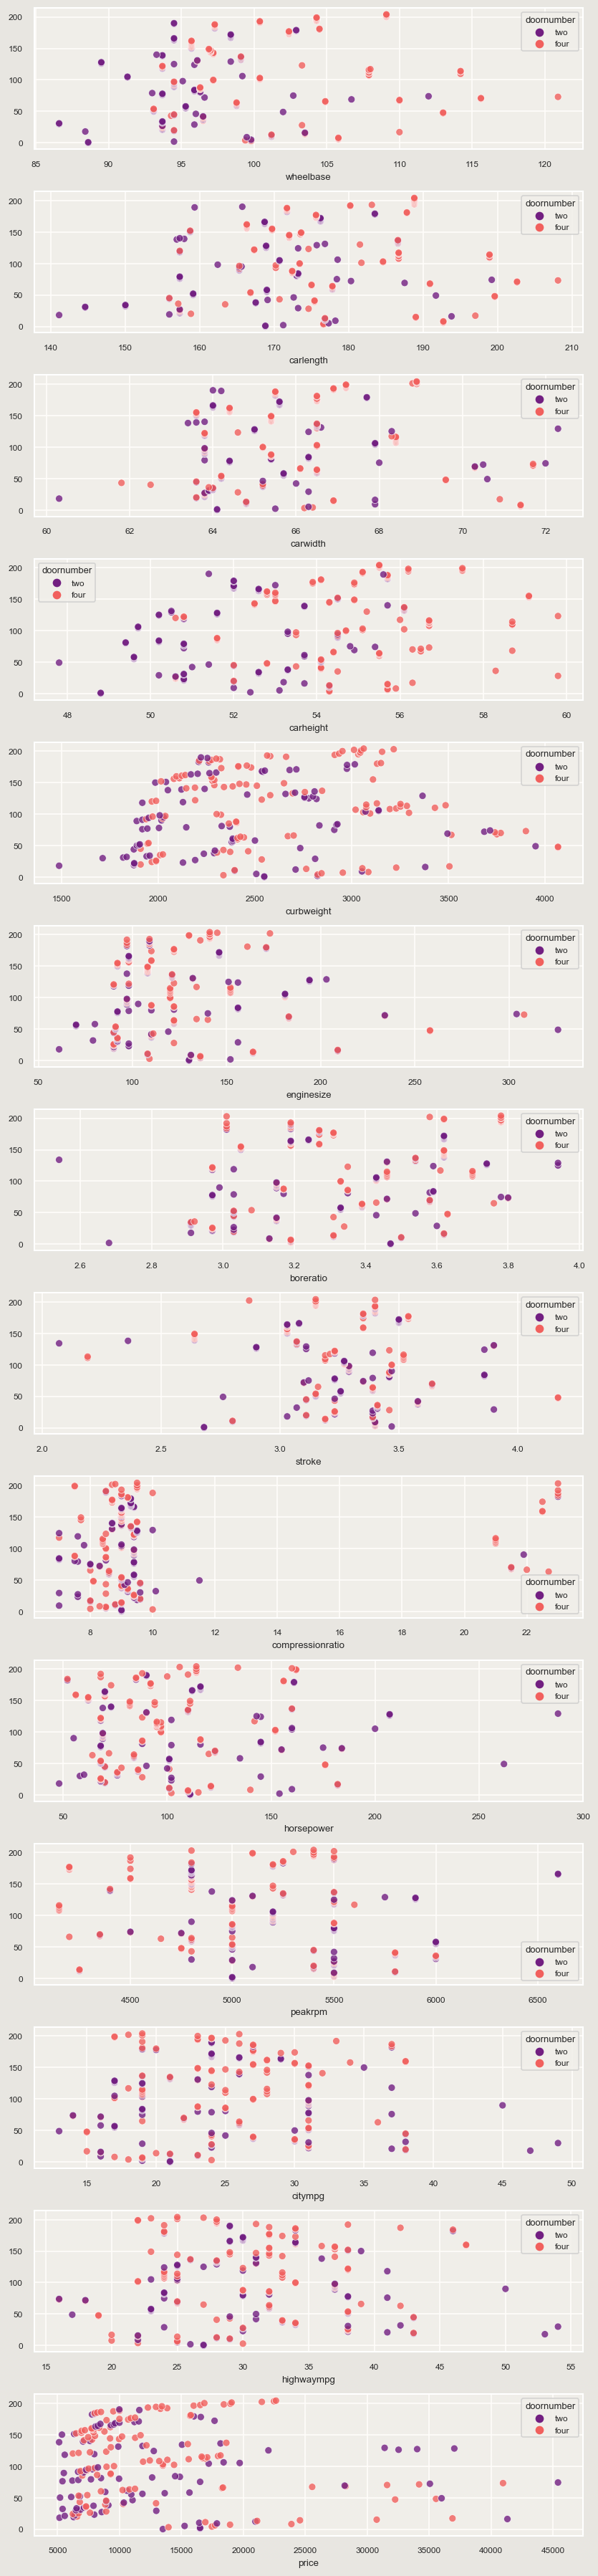

In [40]:
sns.set_theme(rc = {'figure.dpi': 120, 'axes.labelsize': 8, 
                    'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#e8e6e1'}, font_scale = 0.65)

fig, ax = plt.subplots(14, 1, figsize = (7, 30))

for indx, (column, axes) in list(enumerate(list(zip(num, ax.flatten())))):
    
    sns.scatterplot(ax = axes, y = df[column].index, x = df[column],hue = df['doornumber'],
                    palette = 'magma', alpha = 0.8)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()

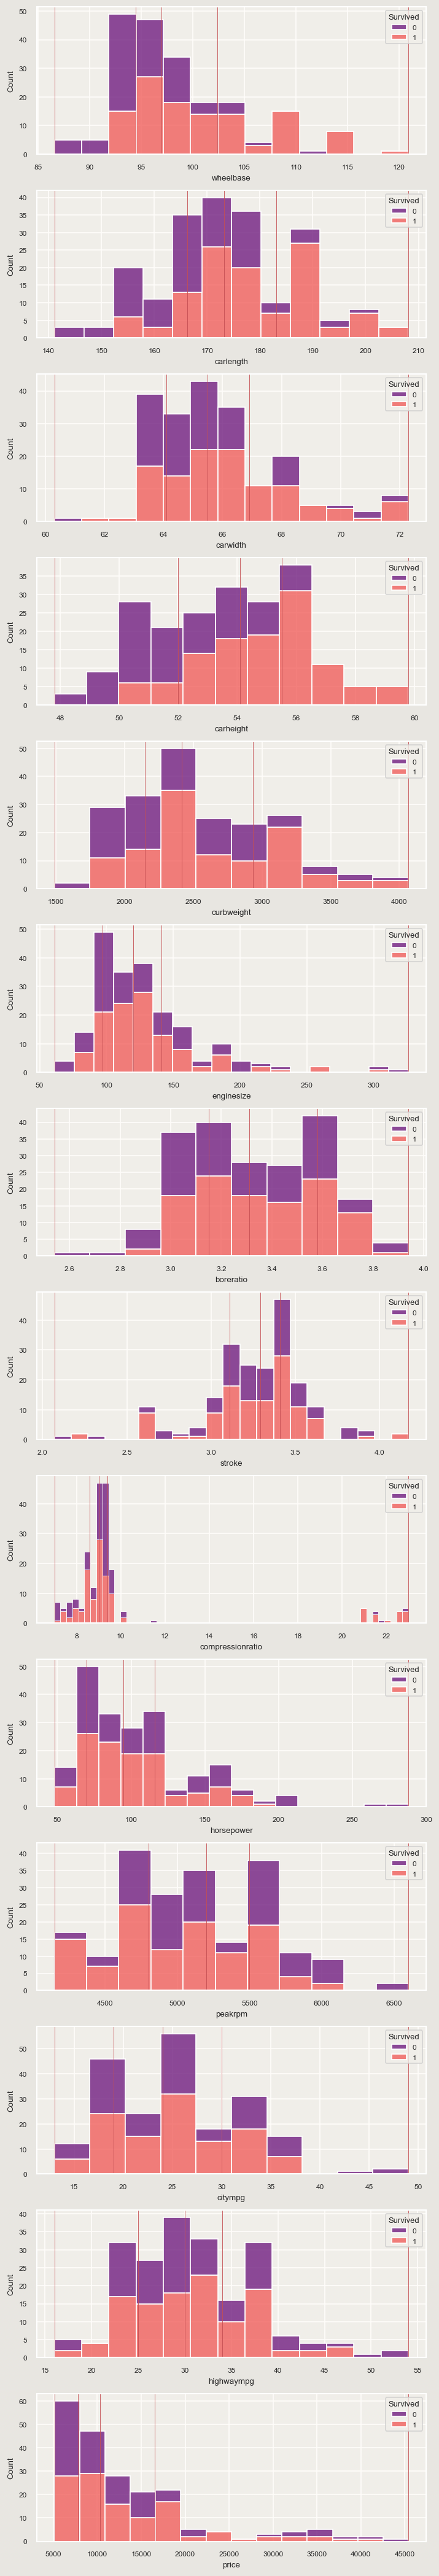

In [41]:
sns.set_theme(rc = {'figure.dpi': 120, 'axes.labelsize': 8, 
                    'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#e8e6e1'}, font_scale = 0.65)

fig, ax = plt.subplots(14, 1, figsize = (6, 35))

for indx, (column, axes) in list(enumerate(list(zip(num, ax.flatten())))):
    
    sns.histplot(ax = axes, x = df[column],hue = df['doornumber'],
                    palette = 'magma', alpha = 0.8, multiple = 'stack')
    
    legend = axes.get_legend() # sns.hisplot has some issues with legend
    handles = legend.legendHandles
    legend.remove()
    axes.legend(handles, ['0', '1'], title = 'Survived', loc = 'upper right')
    Quantiles = np.quantile(df[column], [0, 0.25, 0.50, 0.75, 1])
    
    for q in Quantiles: axes.axvline(x = q, linewidth = 0.5, color = 'r')
        
plt.tight_layout()
plt.show()

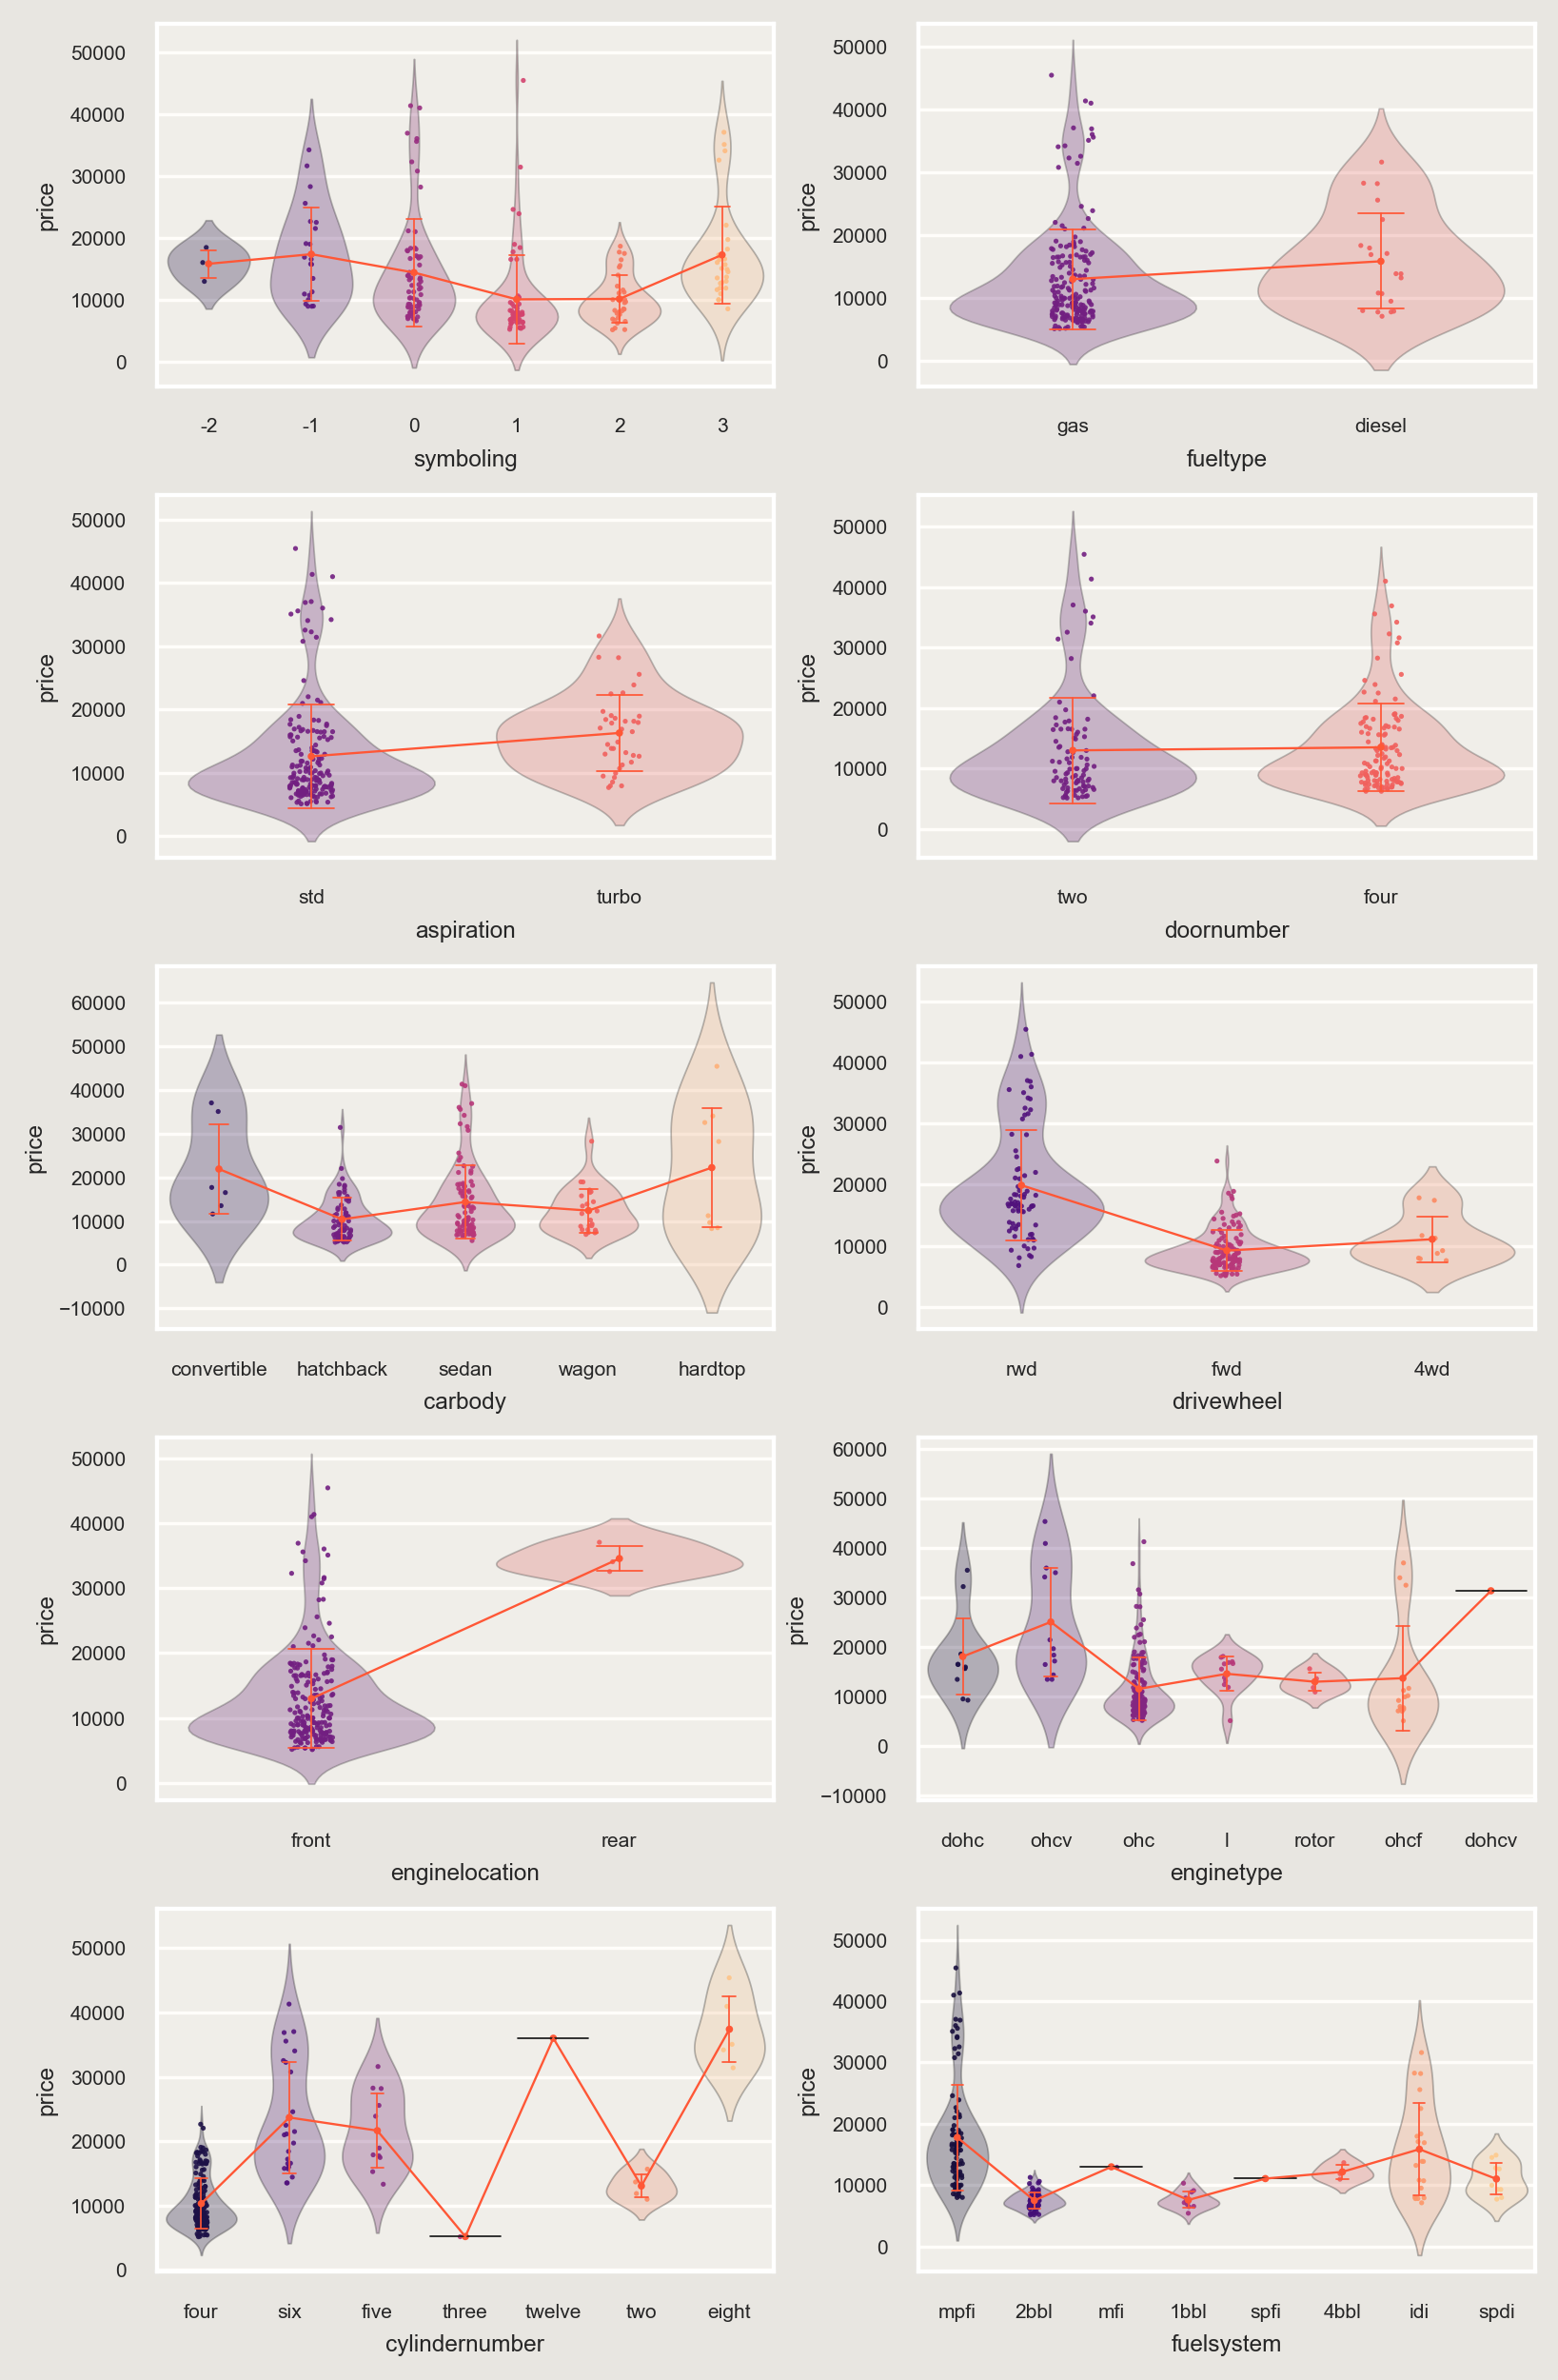

In [42]:
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 7, 
                    'axes.facecolor': '#f0eee9', 'grid.color': '#fffdfa', 
                    'figure.facecolor': '#e8e6e1'}, font_scale = 0.55)

fig, ax = plt.subplots(5, 2, figsize = (6.5, 10))

for indx, (column, axes) in list(enumerate(list(zip(cat, ax.flatten())))):
    
    sns.violinplot(ax = axes, x = df[column], 
                   y = df['price'],
                   scale = 'width', linewidth = 0.5, 
                   palette = 'magma', inner = None)
    
    plt.setp(axes.collections, alpha = 0.3)
    
    sns.stripplot(ax = axes, x = df[column], 
                  y = df['price'],
                  palette = 'magma', alpha = 0.9, 
                  s = 1.5, jitter = 0.07)
    sns.pointplot(ax = axes, x = df[column],
                  y = df['price'],
                  color = '#ff5736', scale = 0.25,
                  estimator = np.mean, ci = 'sd',
                  errwidth = 0.5, capsize = 0.15, join = True)
    
    plt.setp(axes.lines, zorder = 100)
    plt.setp(axes.collections, zorder = 100)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()

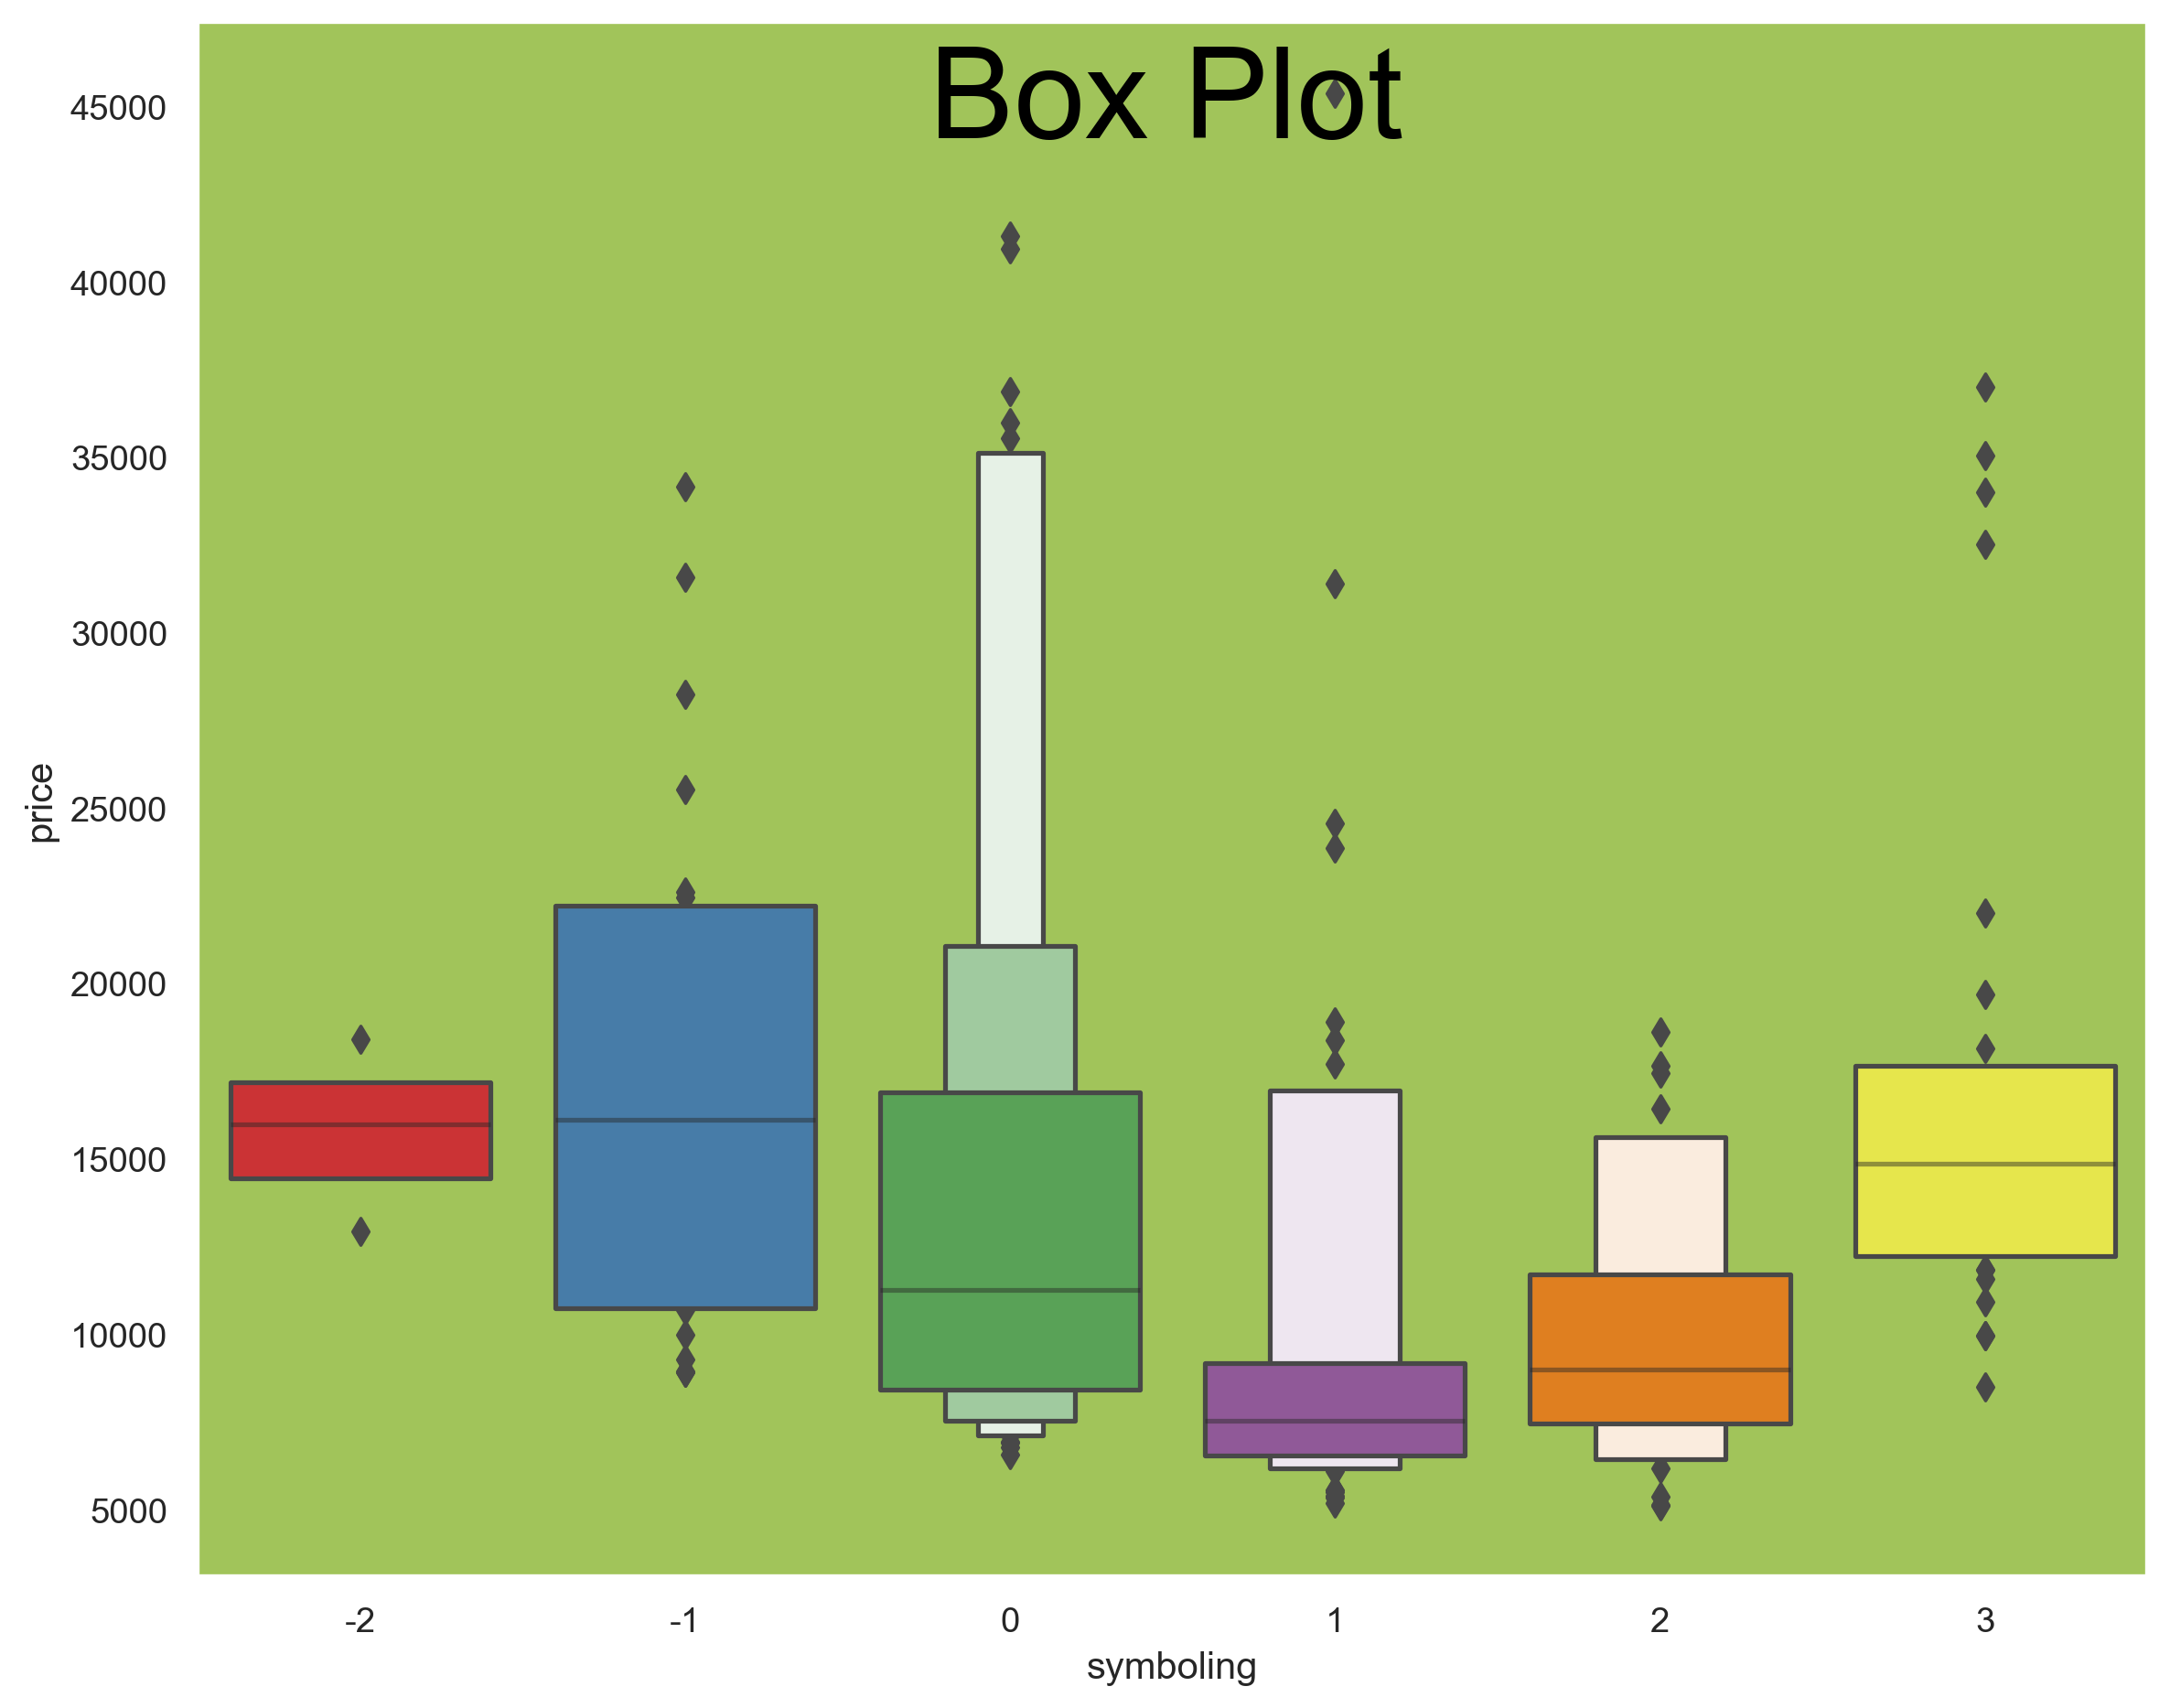

In [43]:
sns.set(rc={"axes.facecolor":"#a1c45a" , "axes.grid" : False})
plt.figure(figsize=(11,9))
plt.gcf().text(.51, .84, "Box Plot", fontsize = 40, color='Black' ,ha='center', va='center')
sns.boxenplot(x=df['symboling'] , y = df['price'],palette="Set1")
plt.show()

<Figure size 2750x2250 with 0 Axes>

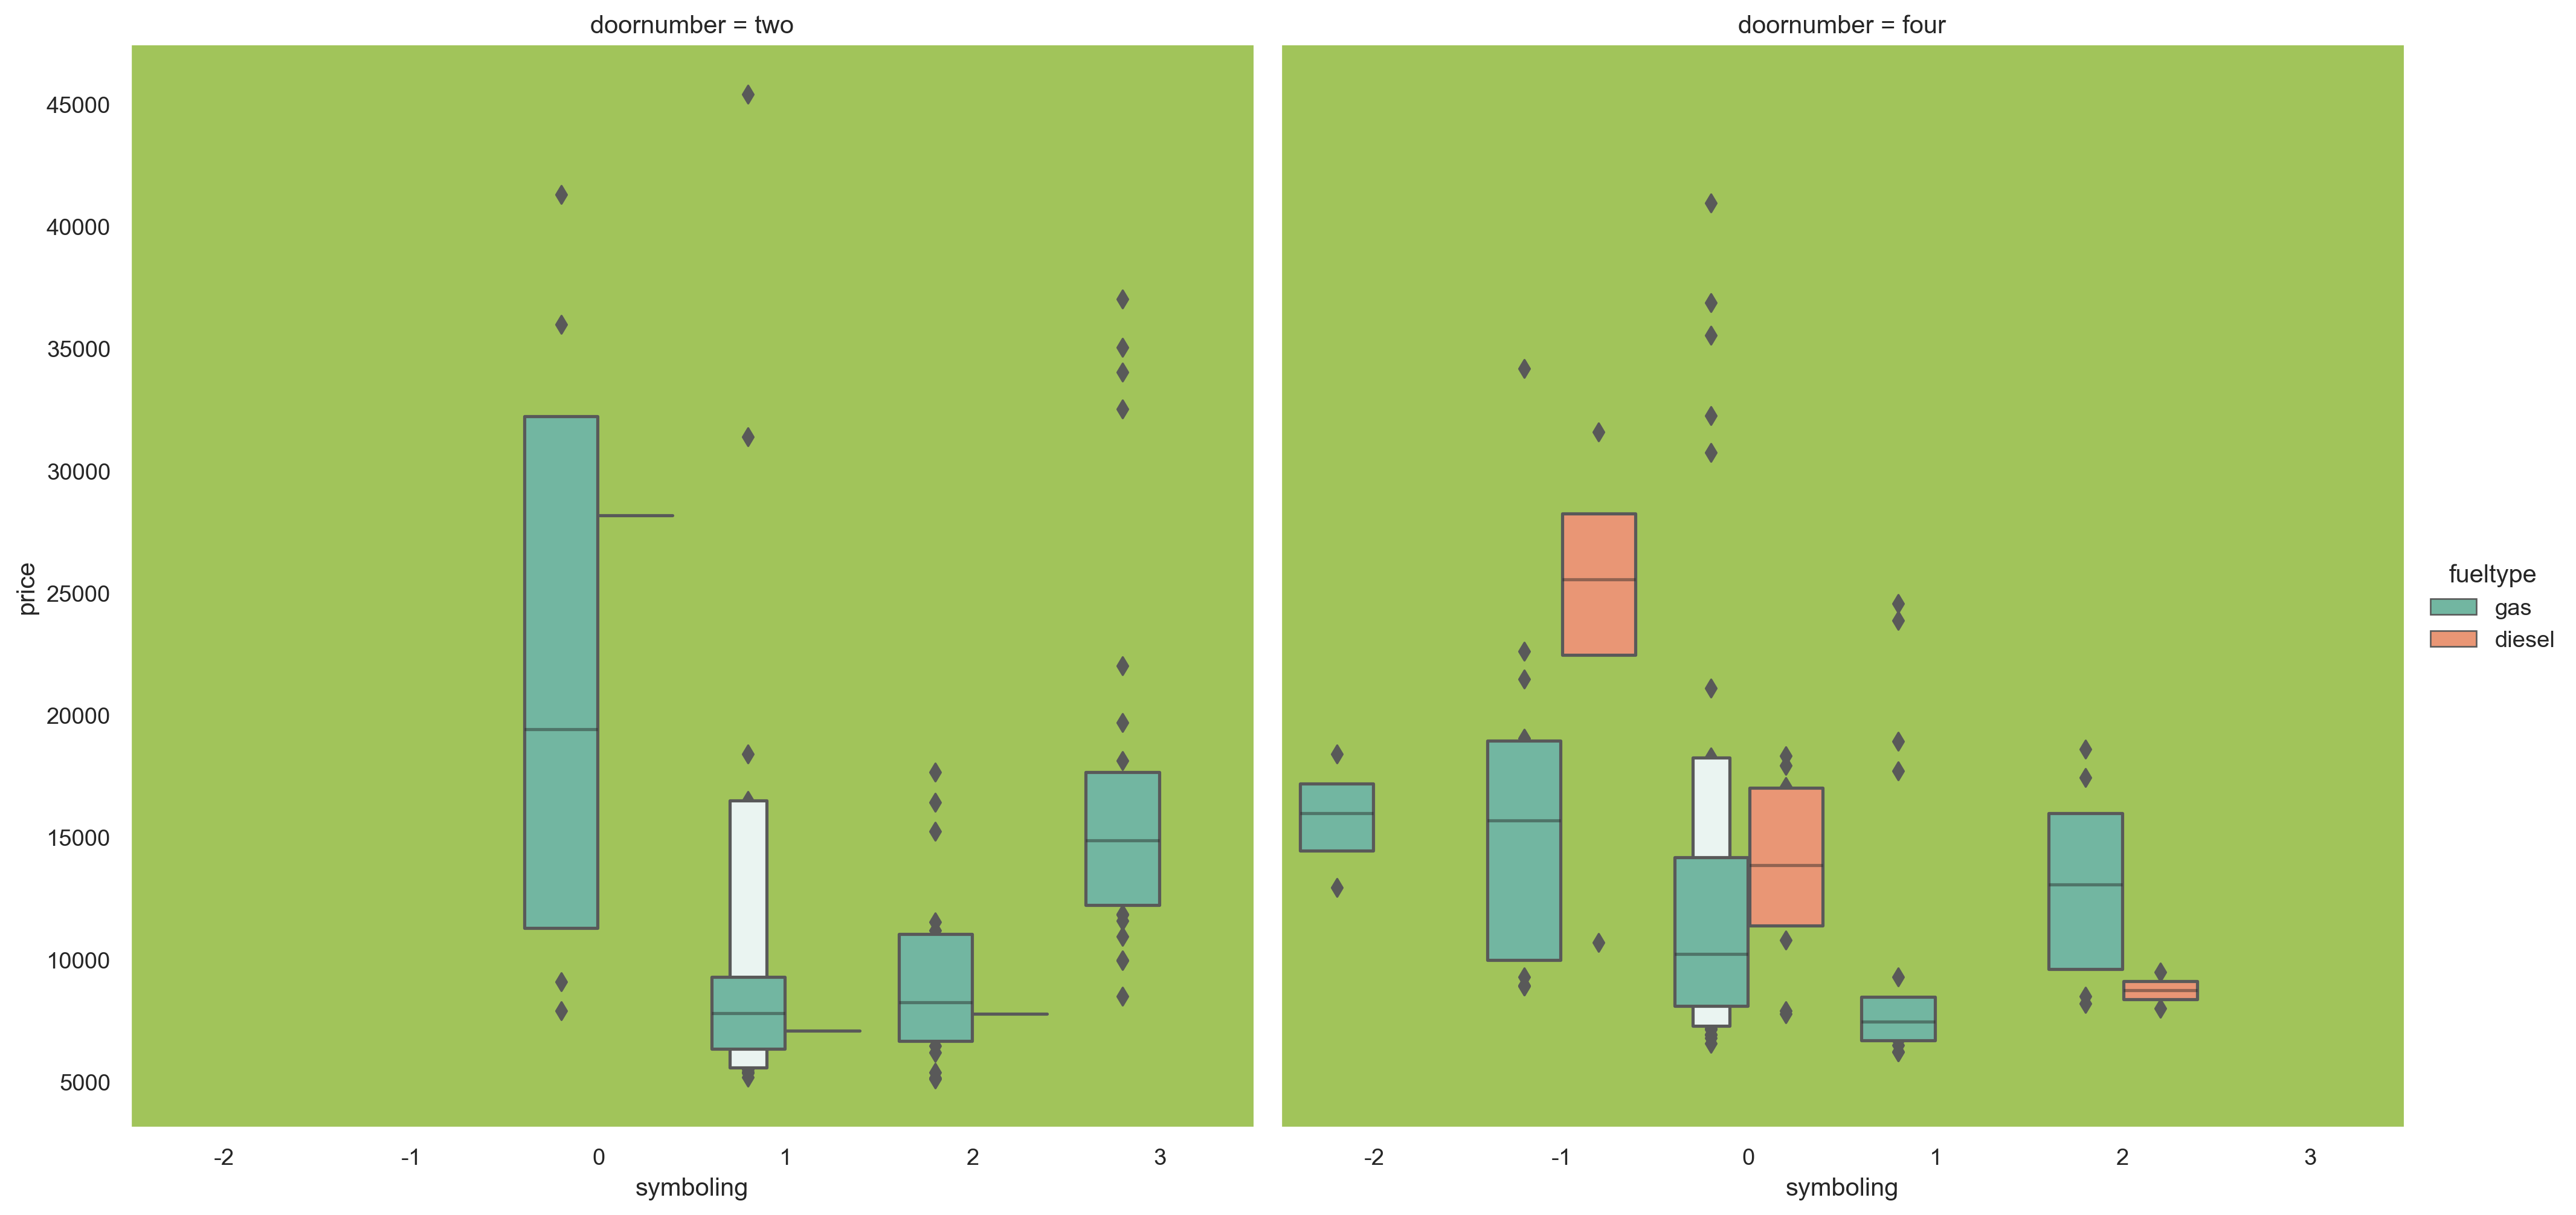

In [44]:
# Facet along the columns to show a categorical variable using "col" parameter
plt.figure(figsize=(11,9))
sns.catplot(x="symboling" , y = "price", hue= "fueltype",
            col="doornumber", kind="boxen",palette="Set2" , height=8, aspect=1 ,data=df)
plt.show()

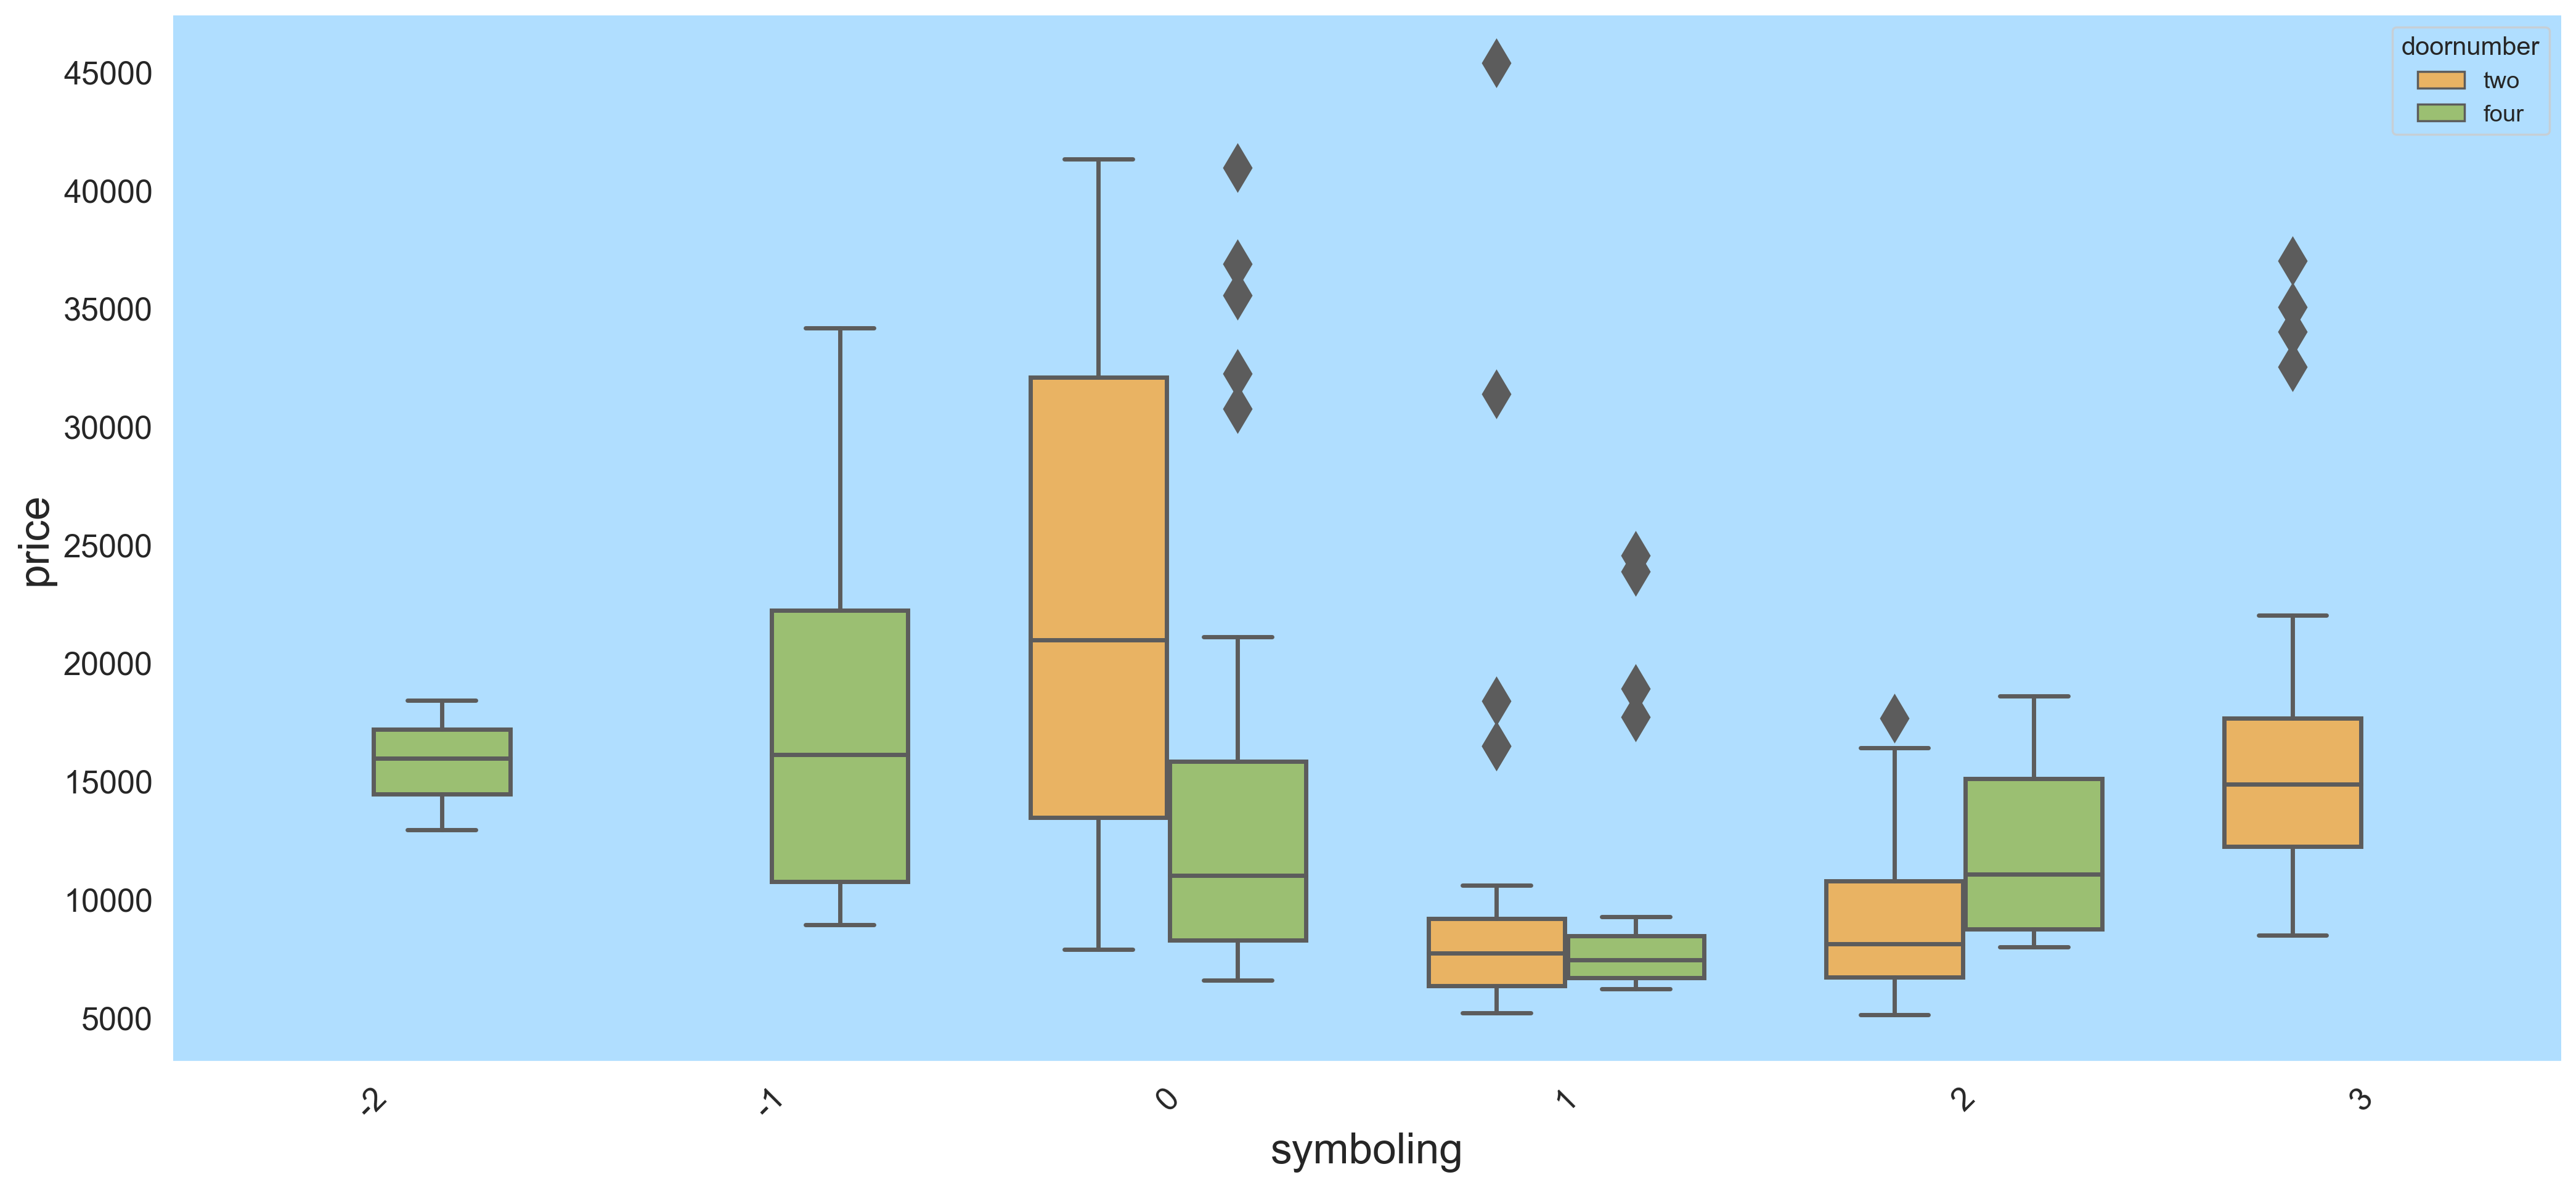

In [45]:
# Change the size of outlier markers
sns.set(rc={"axes.facecolor":"#b0deff","axes.grid":False,
            'xtick.labelsize':15,'ytick.labelsize':15,
            'axes.labelsize':20,'figure.figsize':(20.0, 9.0)})
sns.boxplot(x= df['symboling'] , y= df['price'] , 
            width=.7 , hue=df['doornumber'] , 
            palette= {"two":'#FFB74D' , "four":'#9CCC65'} ,linewidth = 2  , fliersize= 15)
sns.despine(left=True)
plt.xticks(rotation=45)
plt.show()

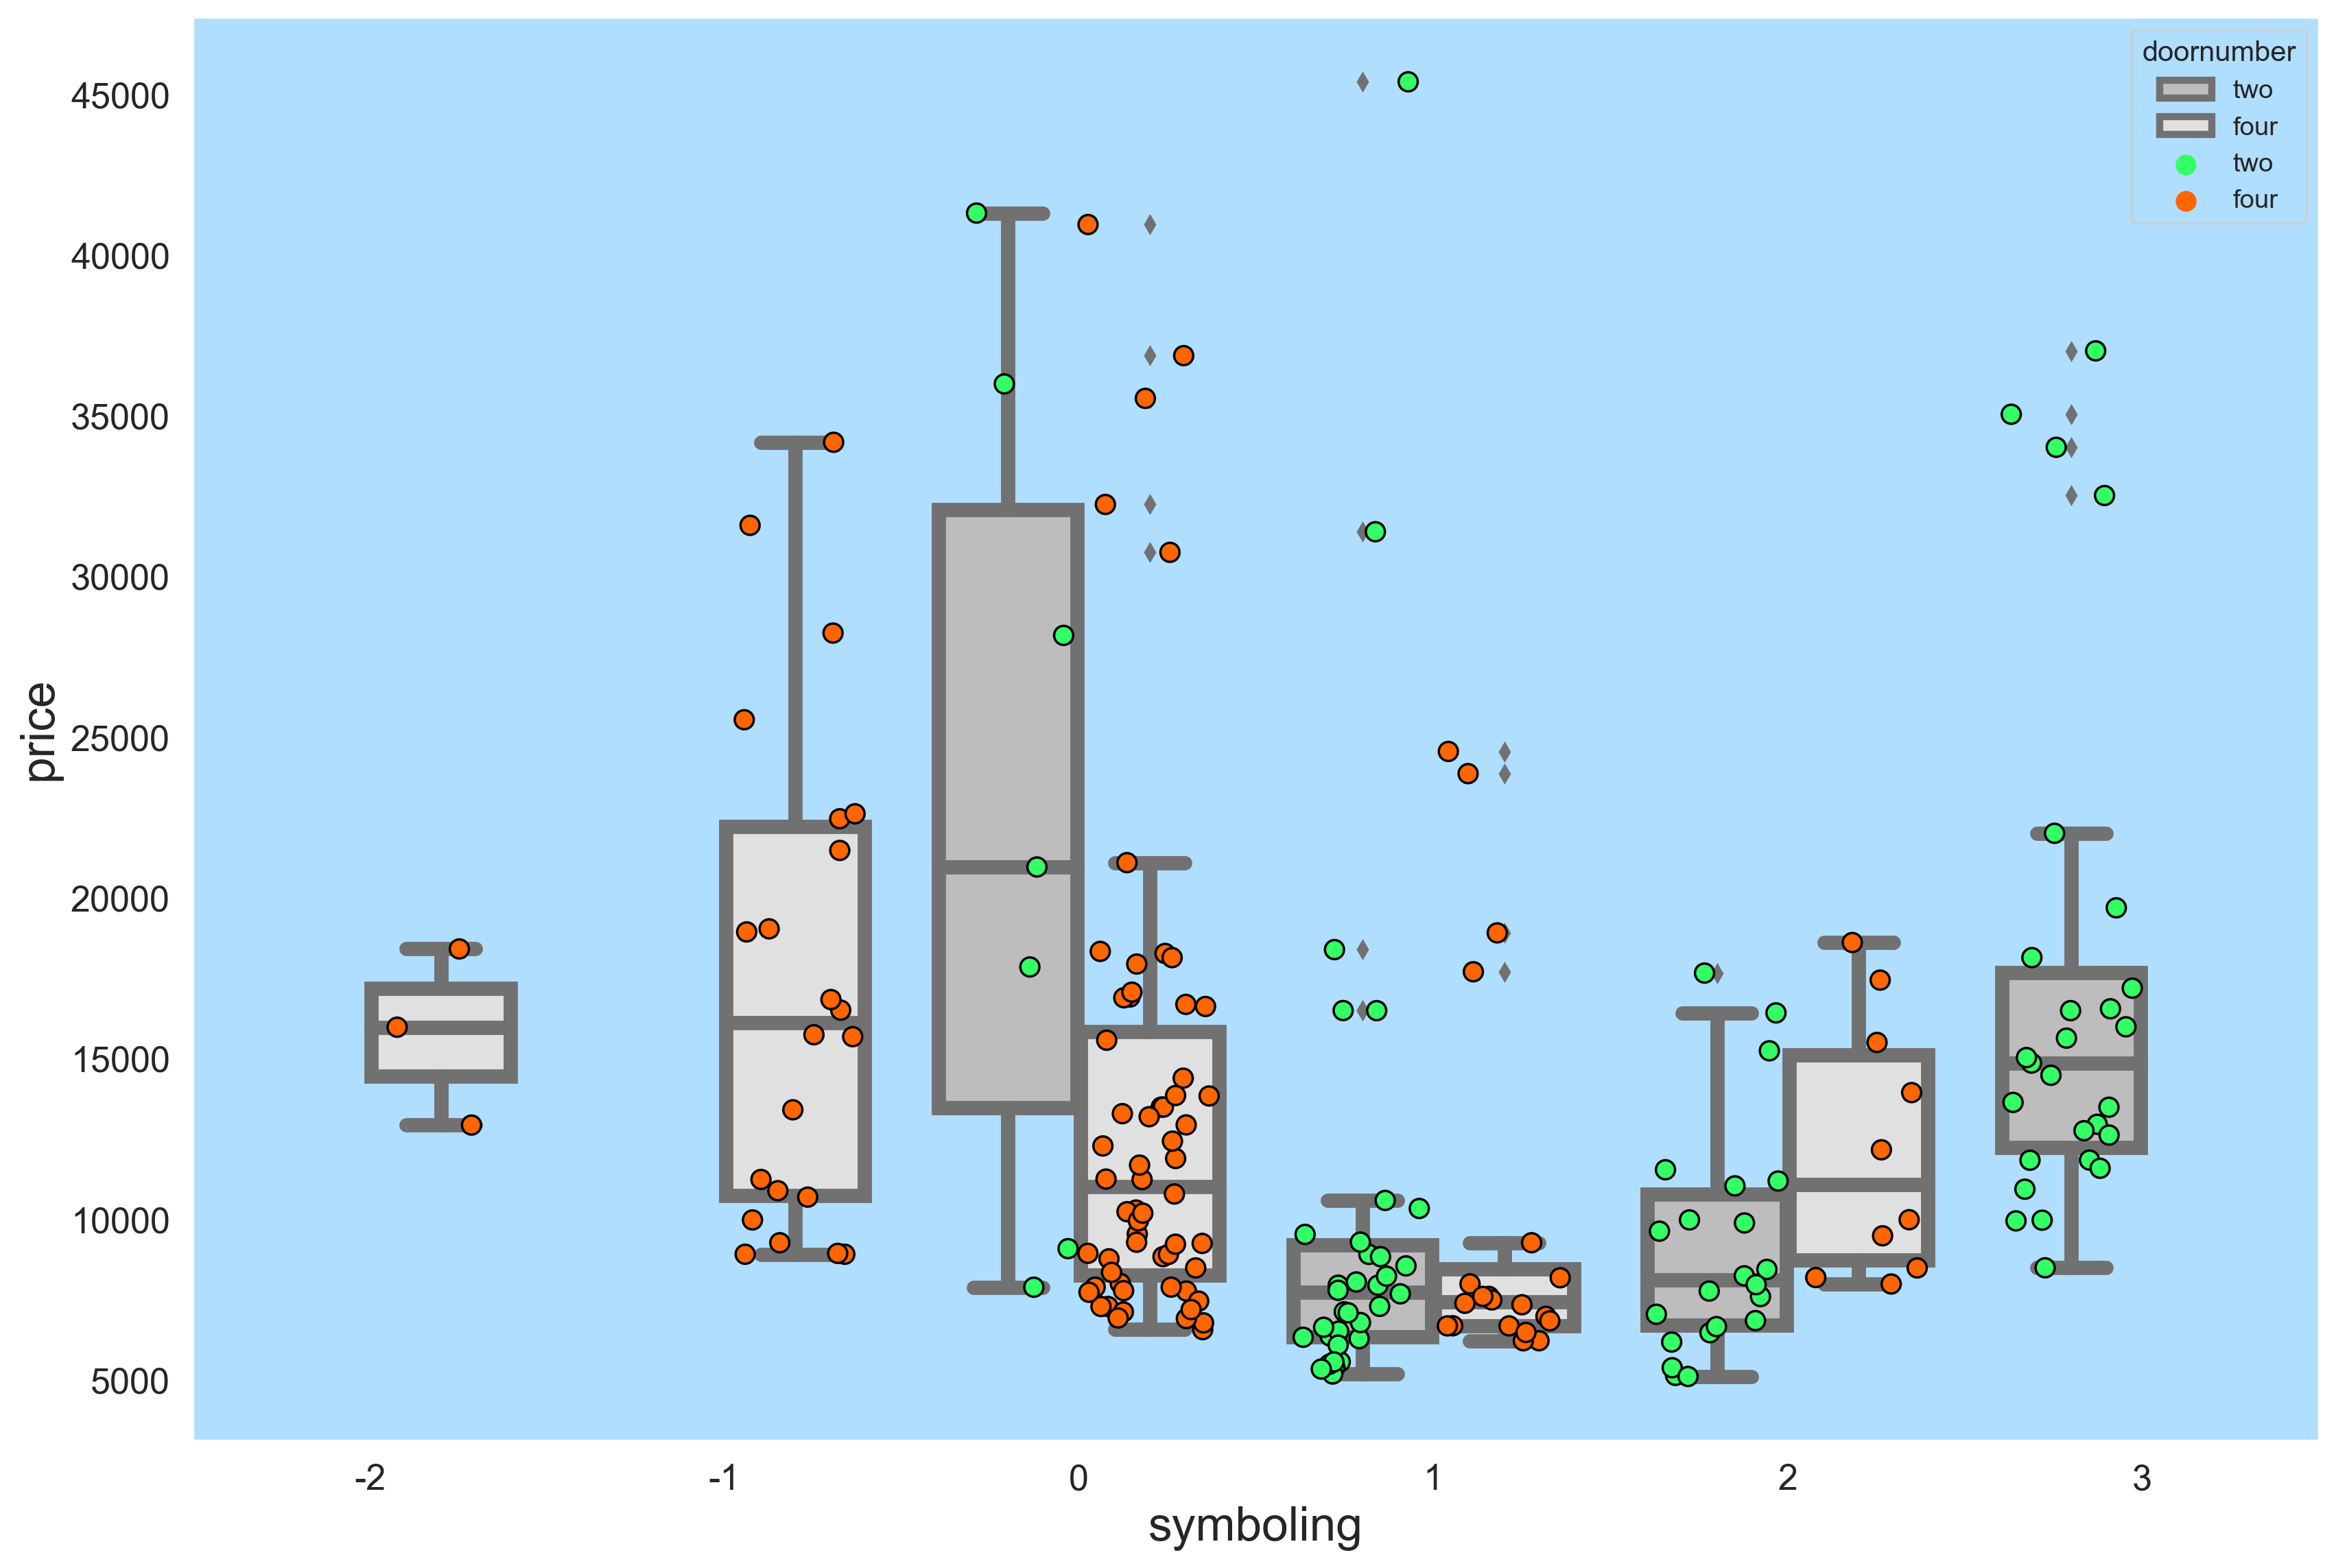

In [46]:
plt.figure(figsize=(16,11))
sns.set(rc={"axes.facecolor":"#b0deff","axes.grid":False,
            'xtick.labelsize':15,'ytick.labelsize':15,
            'axes.labelsize':20,'figure.figsize':(20.0, 9.0)})
params = dict(data=df ,x = df.symboling ,y = df.price ,hue=df.doornumber,dodge=True)
sns.stripplot(**params , size=8,jitter=0.35,palette=['#33FF66','#FF6600'],edgecolor='black',linewidth=1)
sns.boxplot(**params ,palette=['#BDBDBD','#E0E0E0'],linewidth=6)
plt.show()

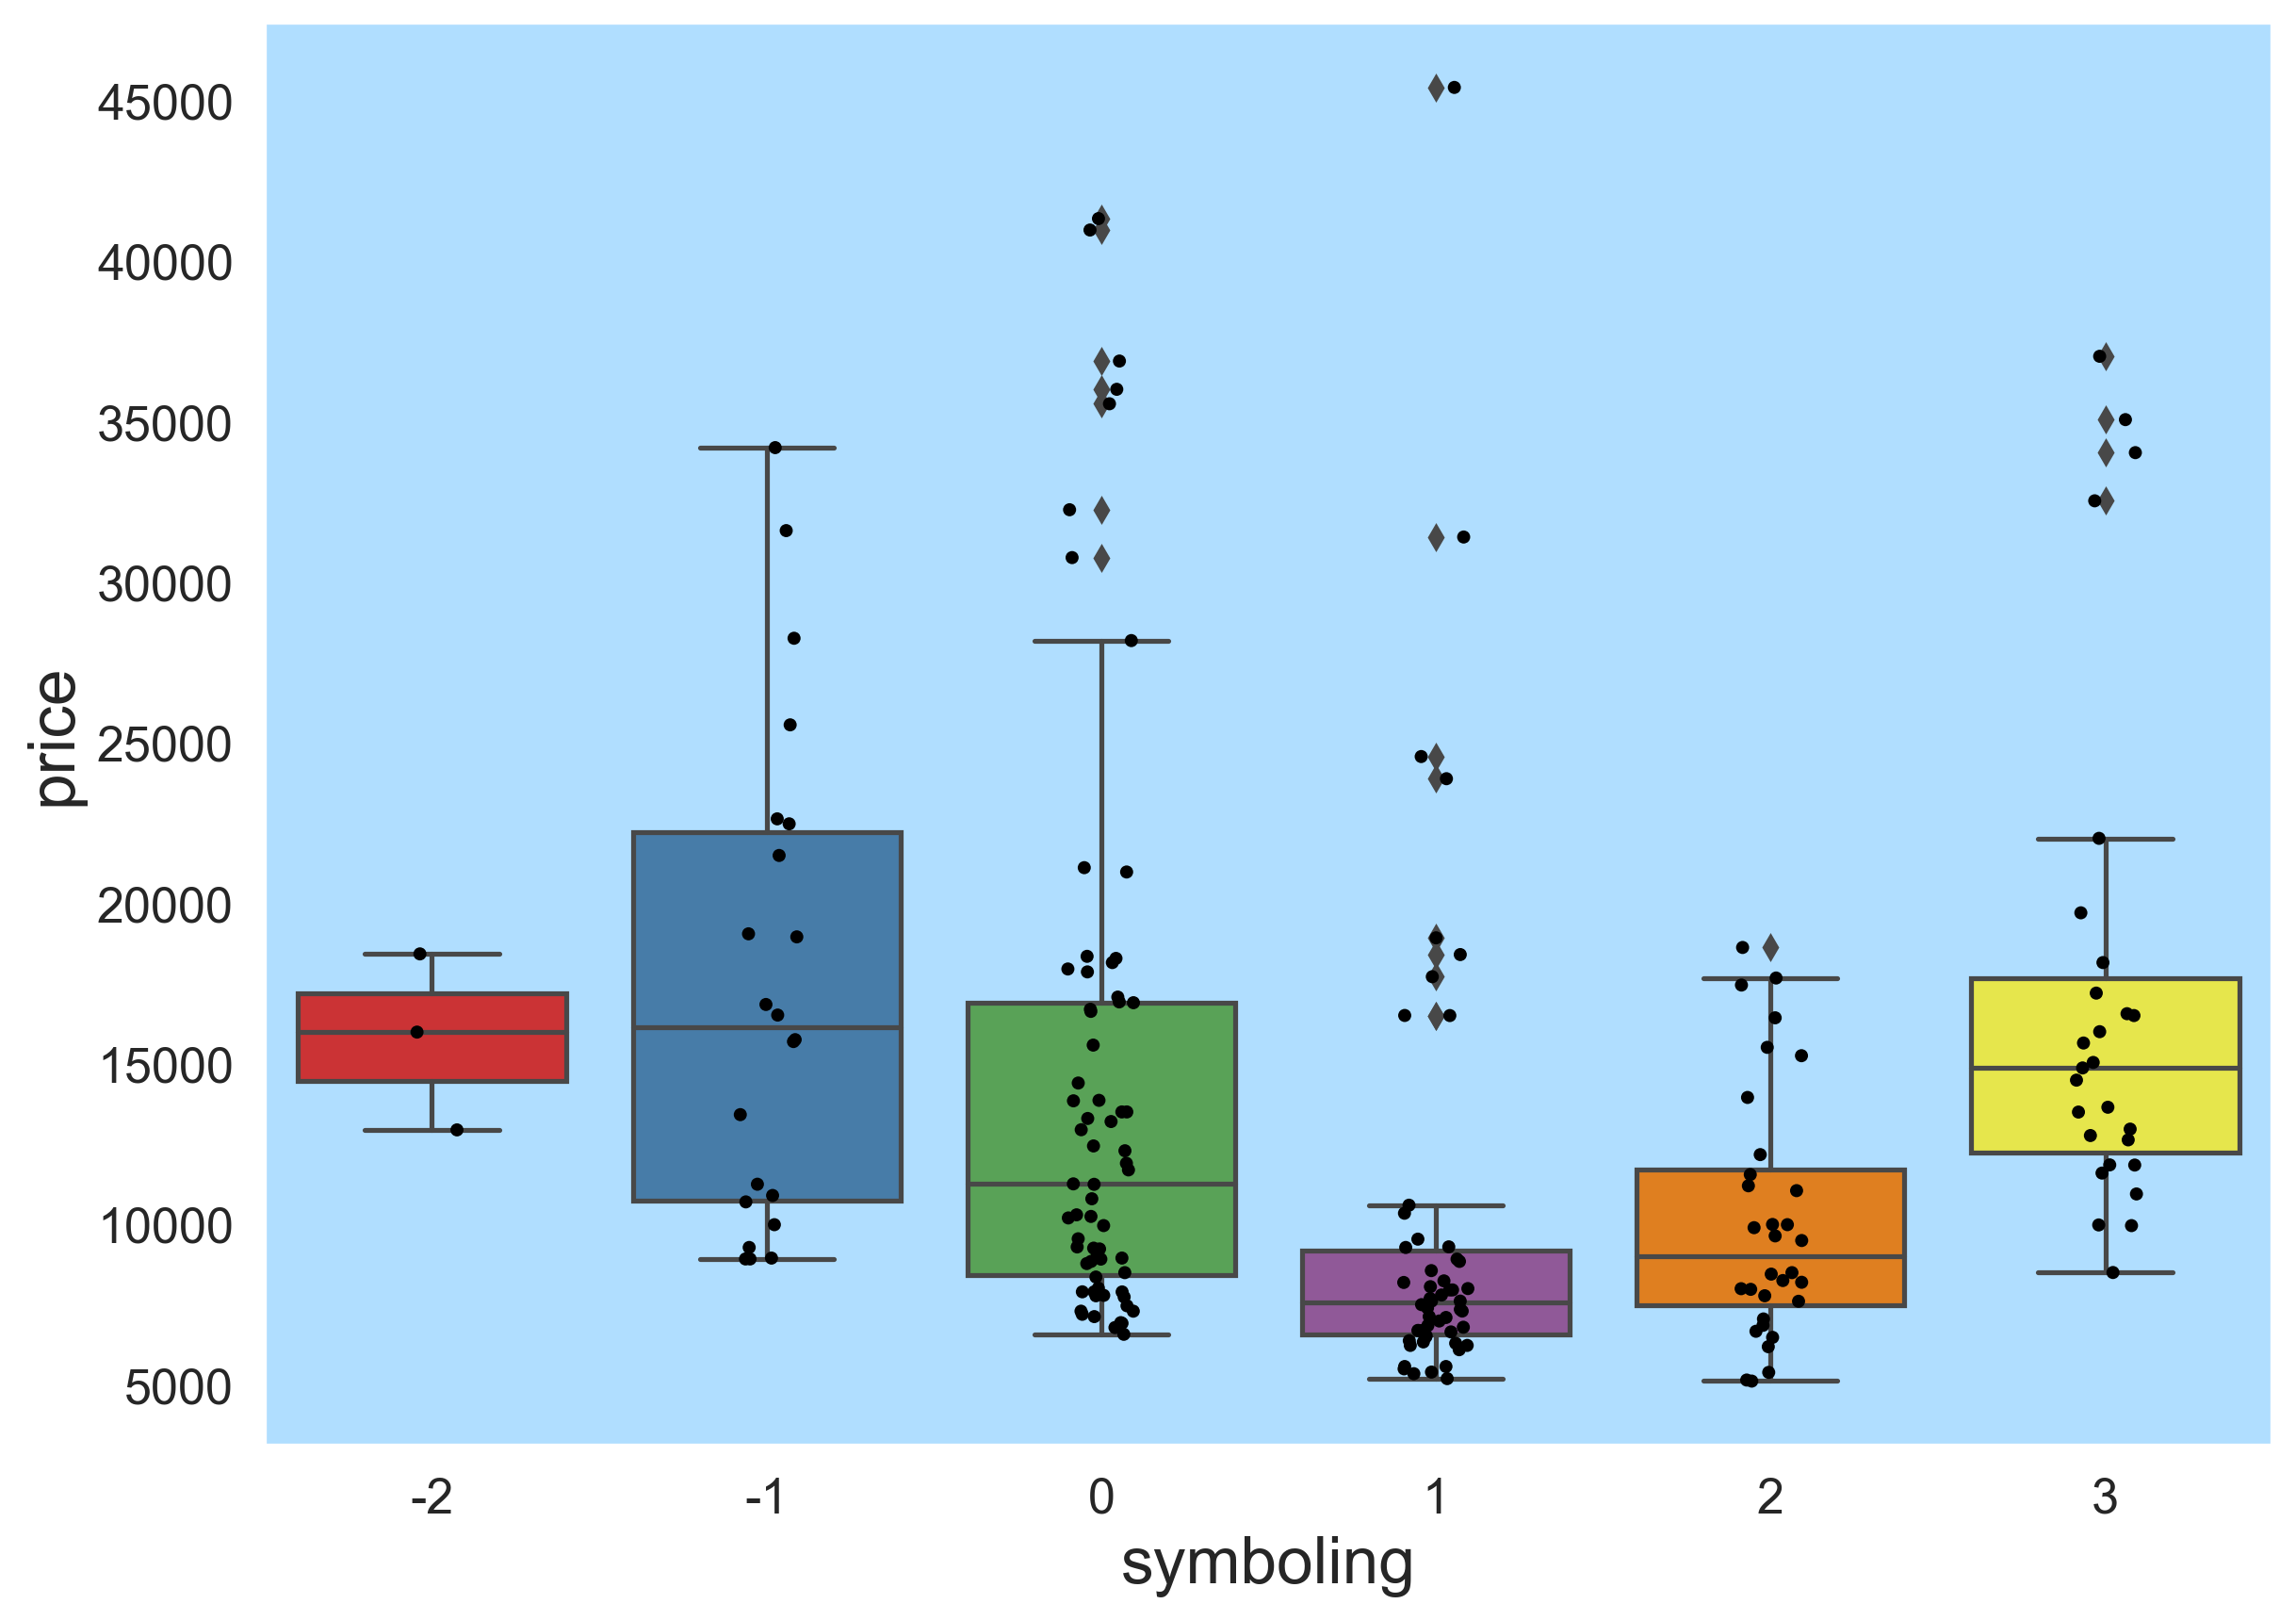

In [47]:
# Drawing stripplot on top of a box plot
plt.figure(figsize=(11,8))
sns.stripplot(x=df.symboling, y = df.price , jitter=True , color="black" , size=4)
sns.boxplot(x=df.symboling ,palette="Set1", y = df.price , color='black')
plt.show()

In [48]:
df1 = df[df['drivewheel'].isin(['rwd', 'fwd', '4wd'])]
df1.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0               9.0         111     5000       21          27  13495.0  
1               9.0         111     5000       21          27  16500.0  
2               9.0         154     5000       19          26  16500.0  
3              10.0         102     5500       24          30  13950.0  
4               8.0         115     5500       18          22  17450.0

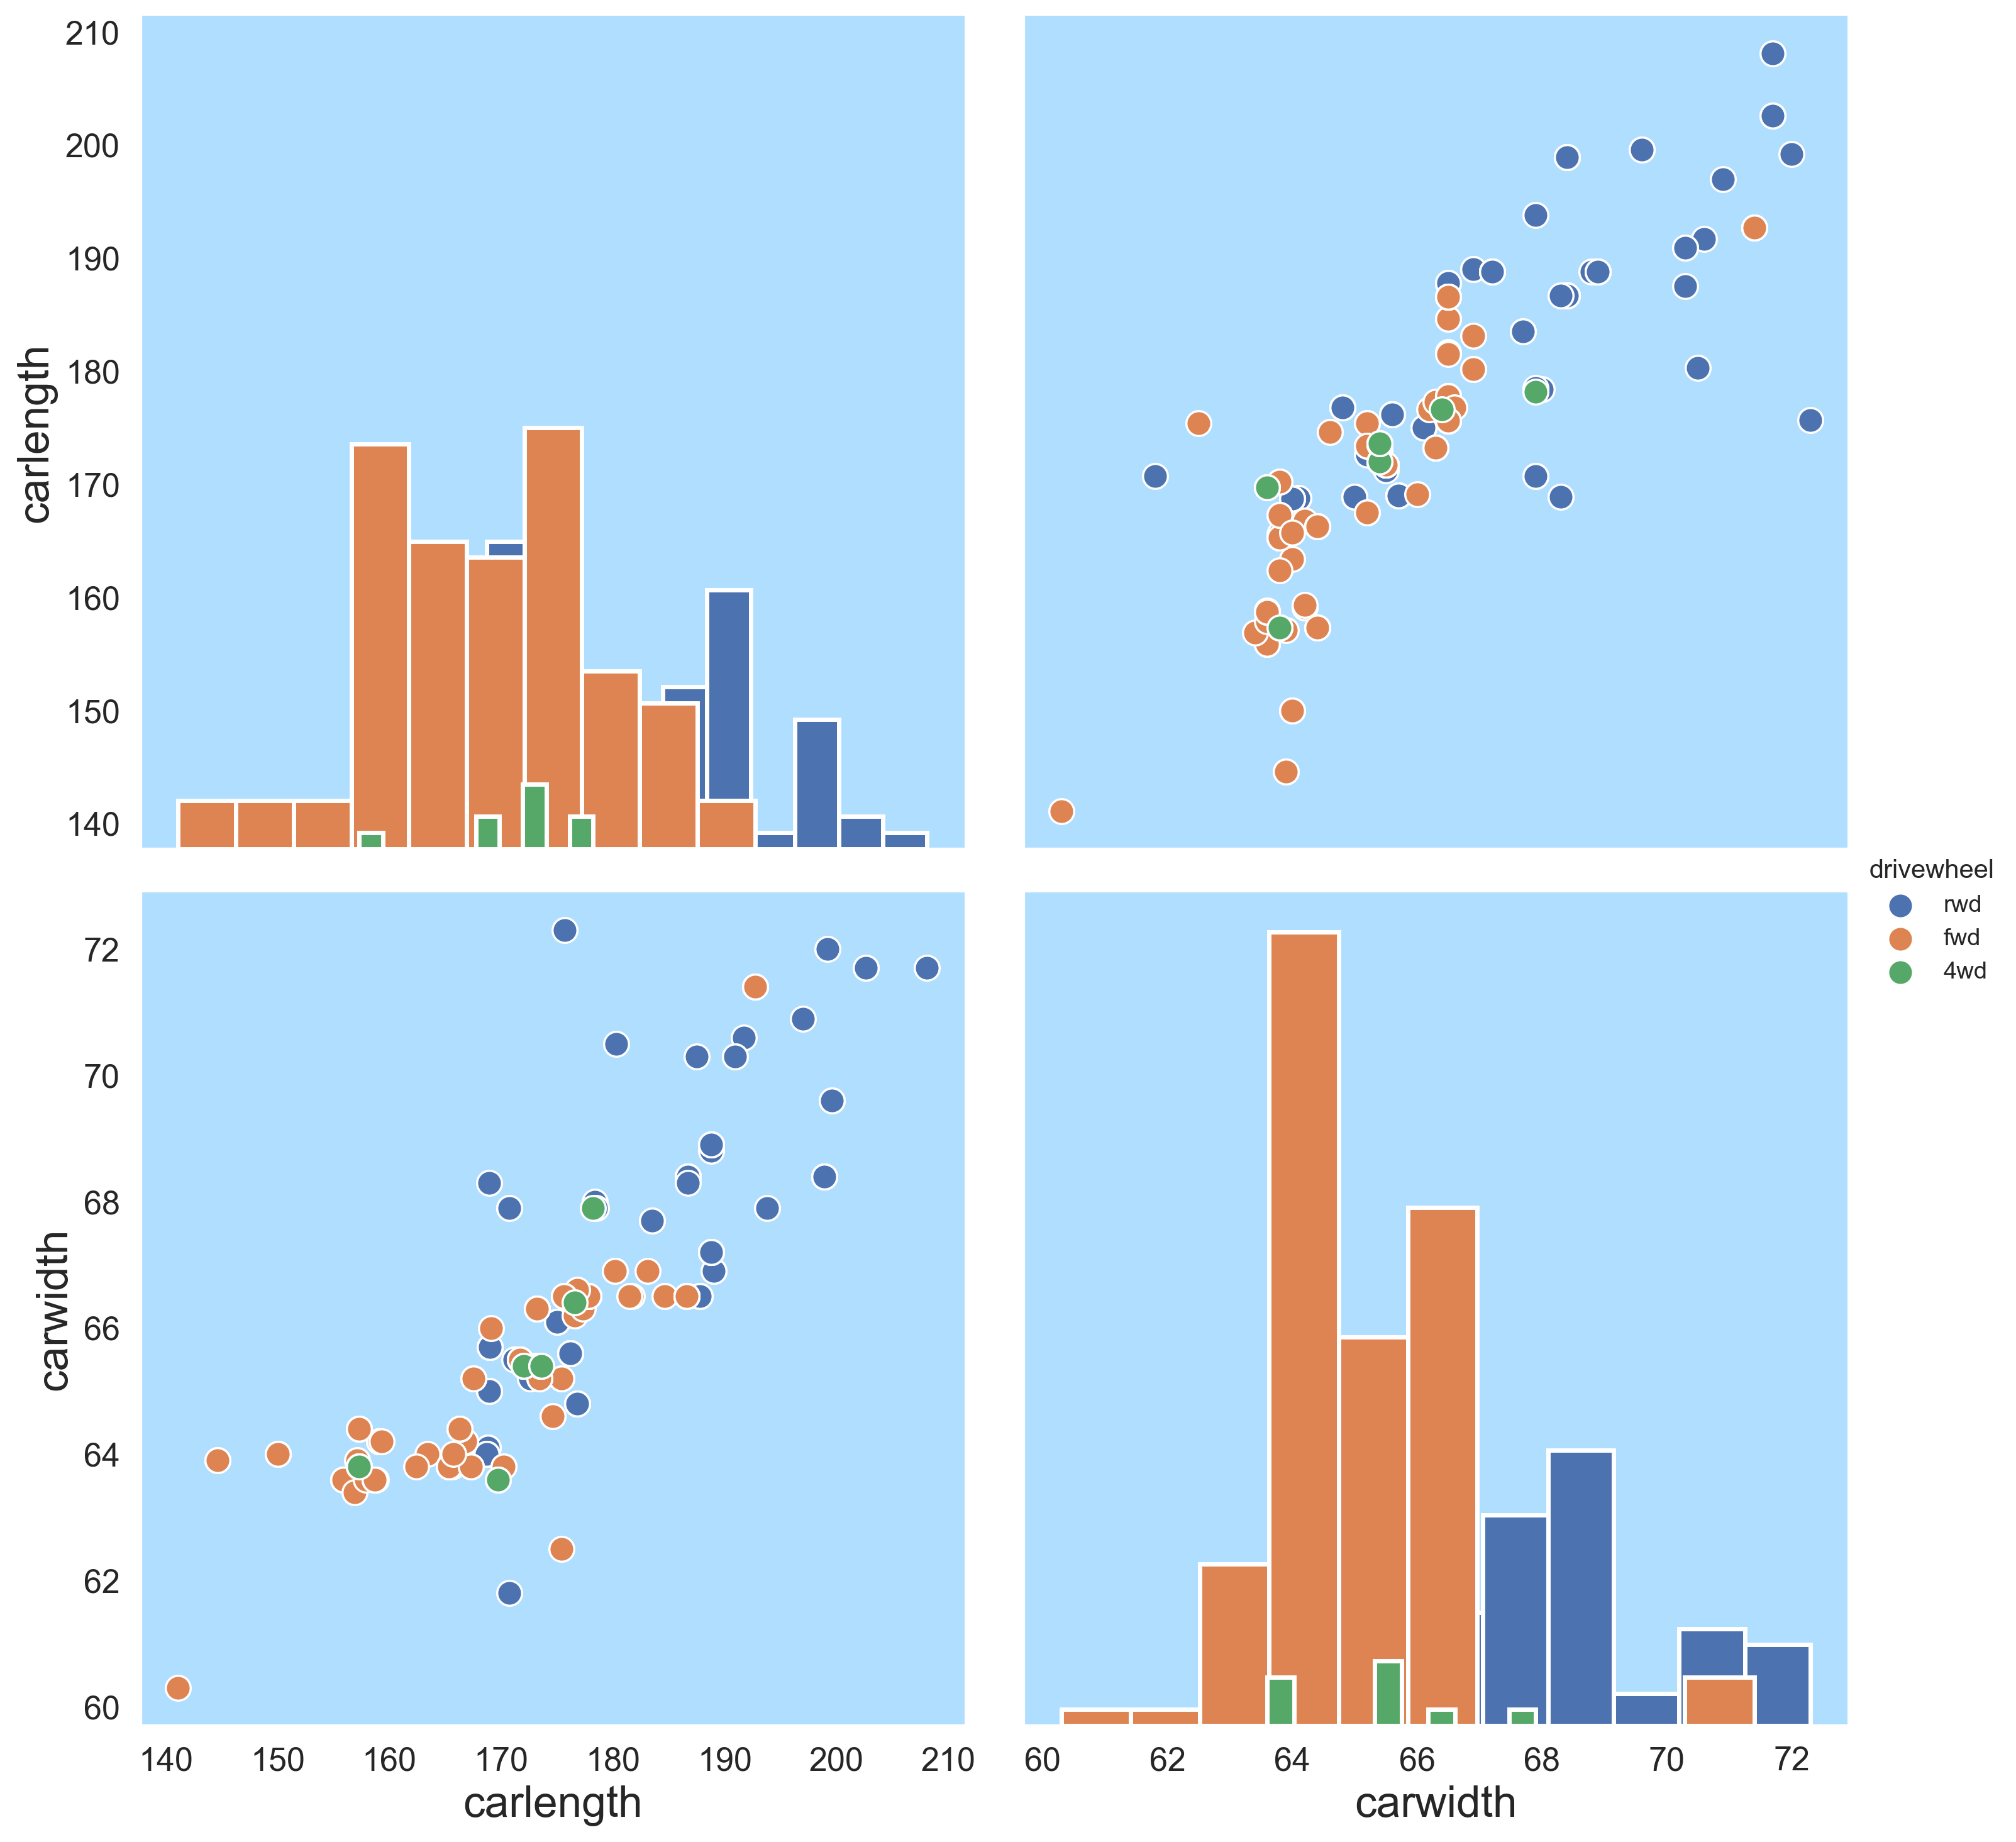

In [49]:
# Plot a subset of variables
g = sns.PairGrid(df1 , hue='drivewheel' ,x_vars=["carlength" , "carwidth"],y_vars=["carlength" , "carwidth"],
                 height=6, aspect=1)
g = g.map_offdiag(plt.scatter , edgecolor="w", s=130)
g = g.map_diag(plt.hist , edgecolor ='w', linewidth=2)
g = g.add_legend()
plt.show()

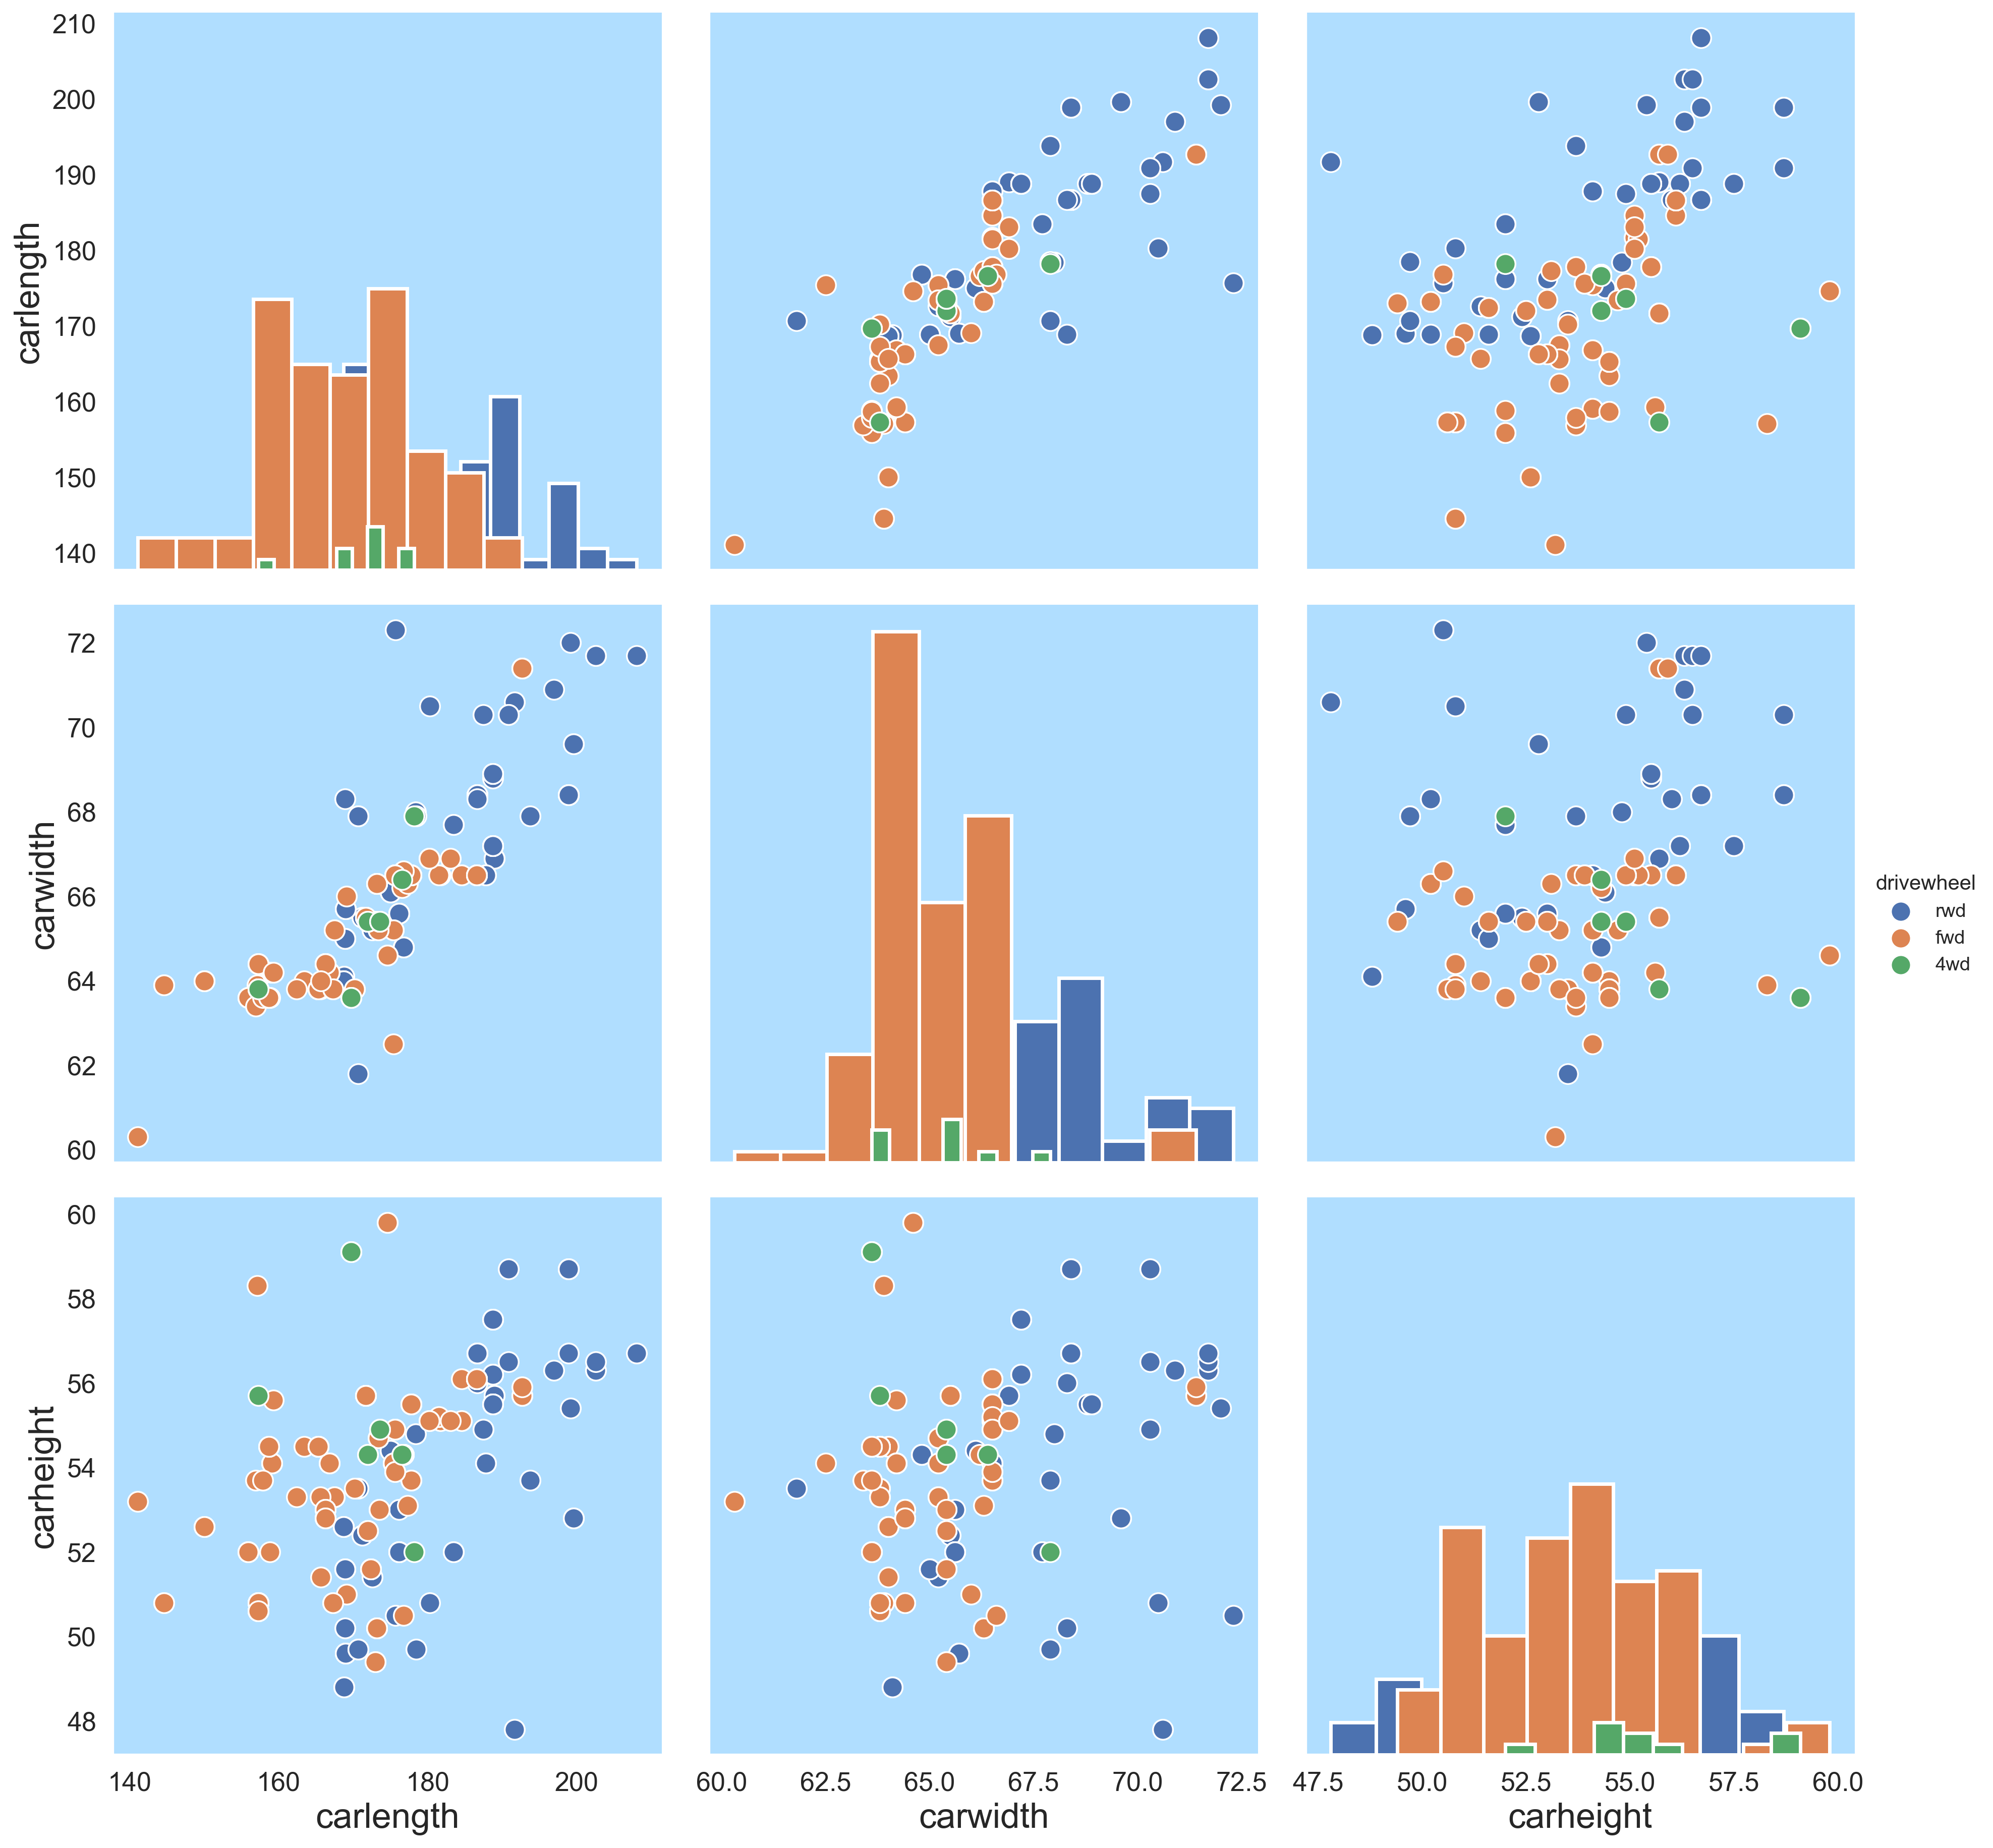

In [50]:
# Plot a subset of variables
g = sns.PairGrid(df1 , hue='drivewheel' ,vars=["carlength" , "carwidth","carheight"],height=5, aspect=1)
g = g.map_offdiag(plt.scatter , edgecolor="w", s=130)
g = g.map_diag(plt.hist , edgecolor ='w', linewidth=2)
g = g.add_legend()
plt.show()

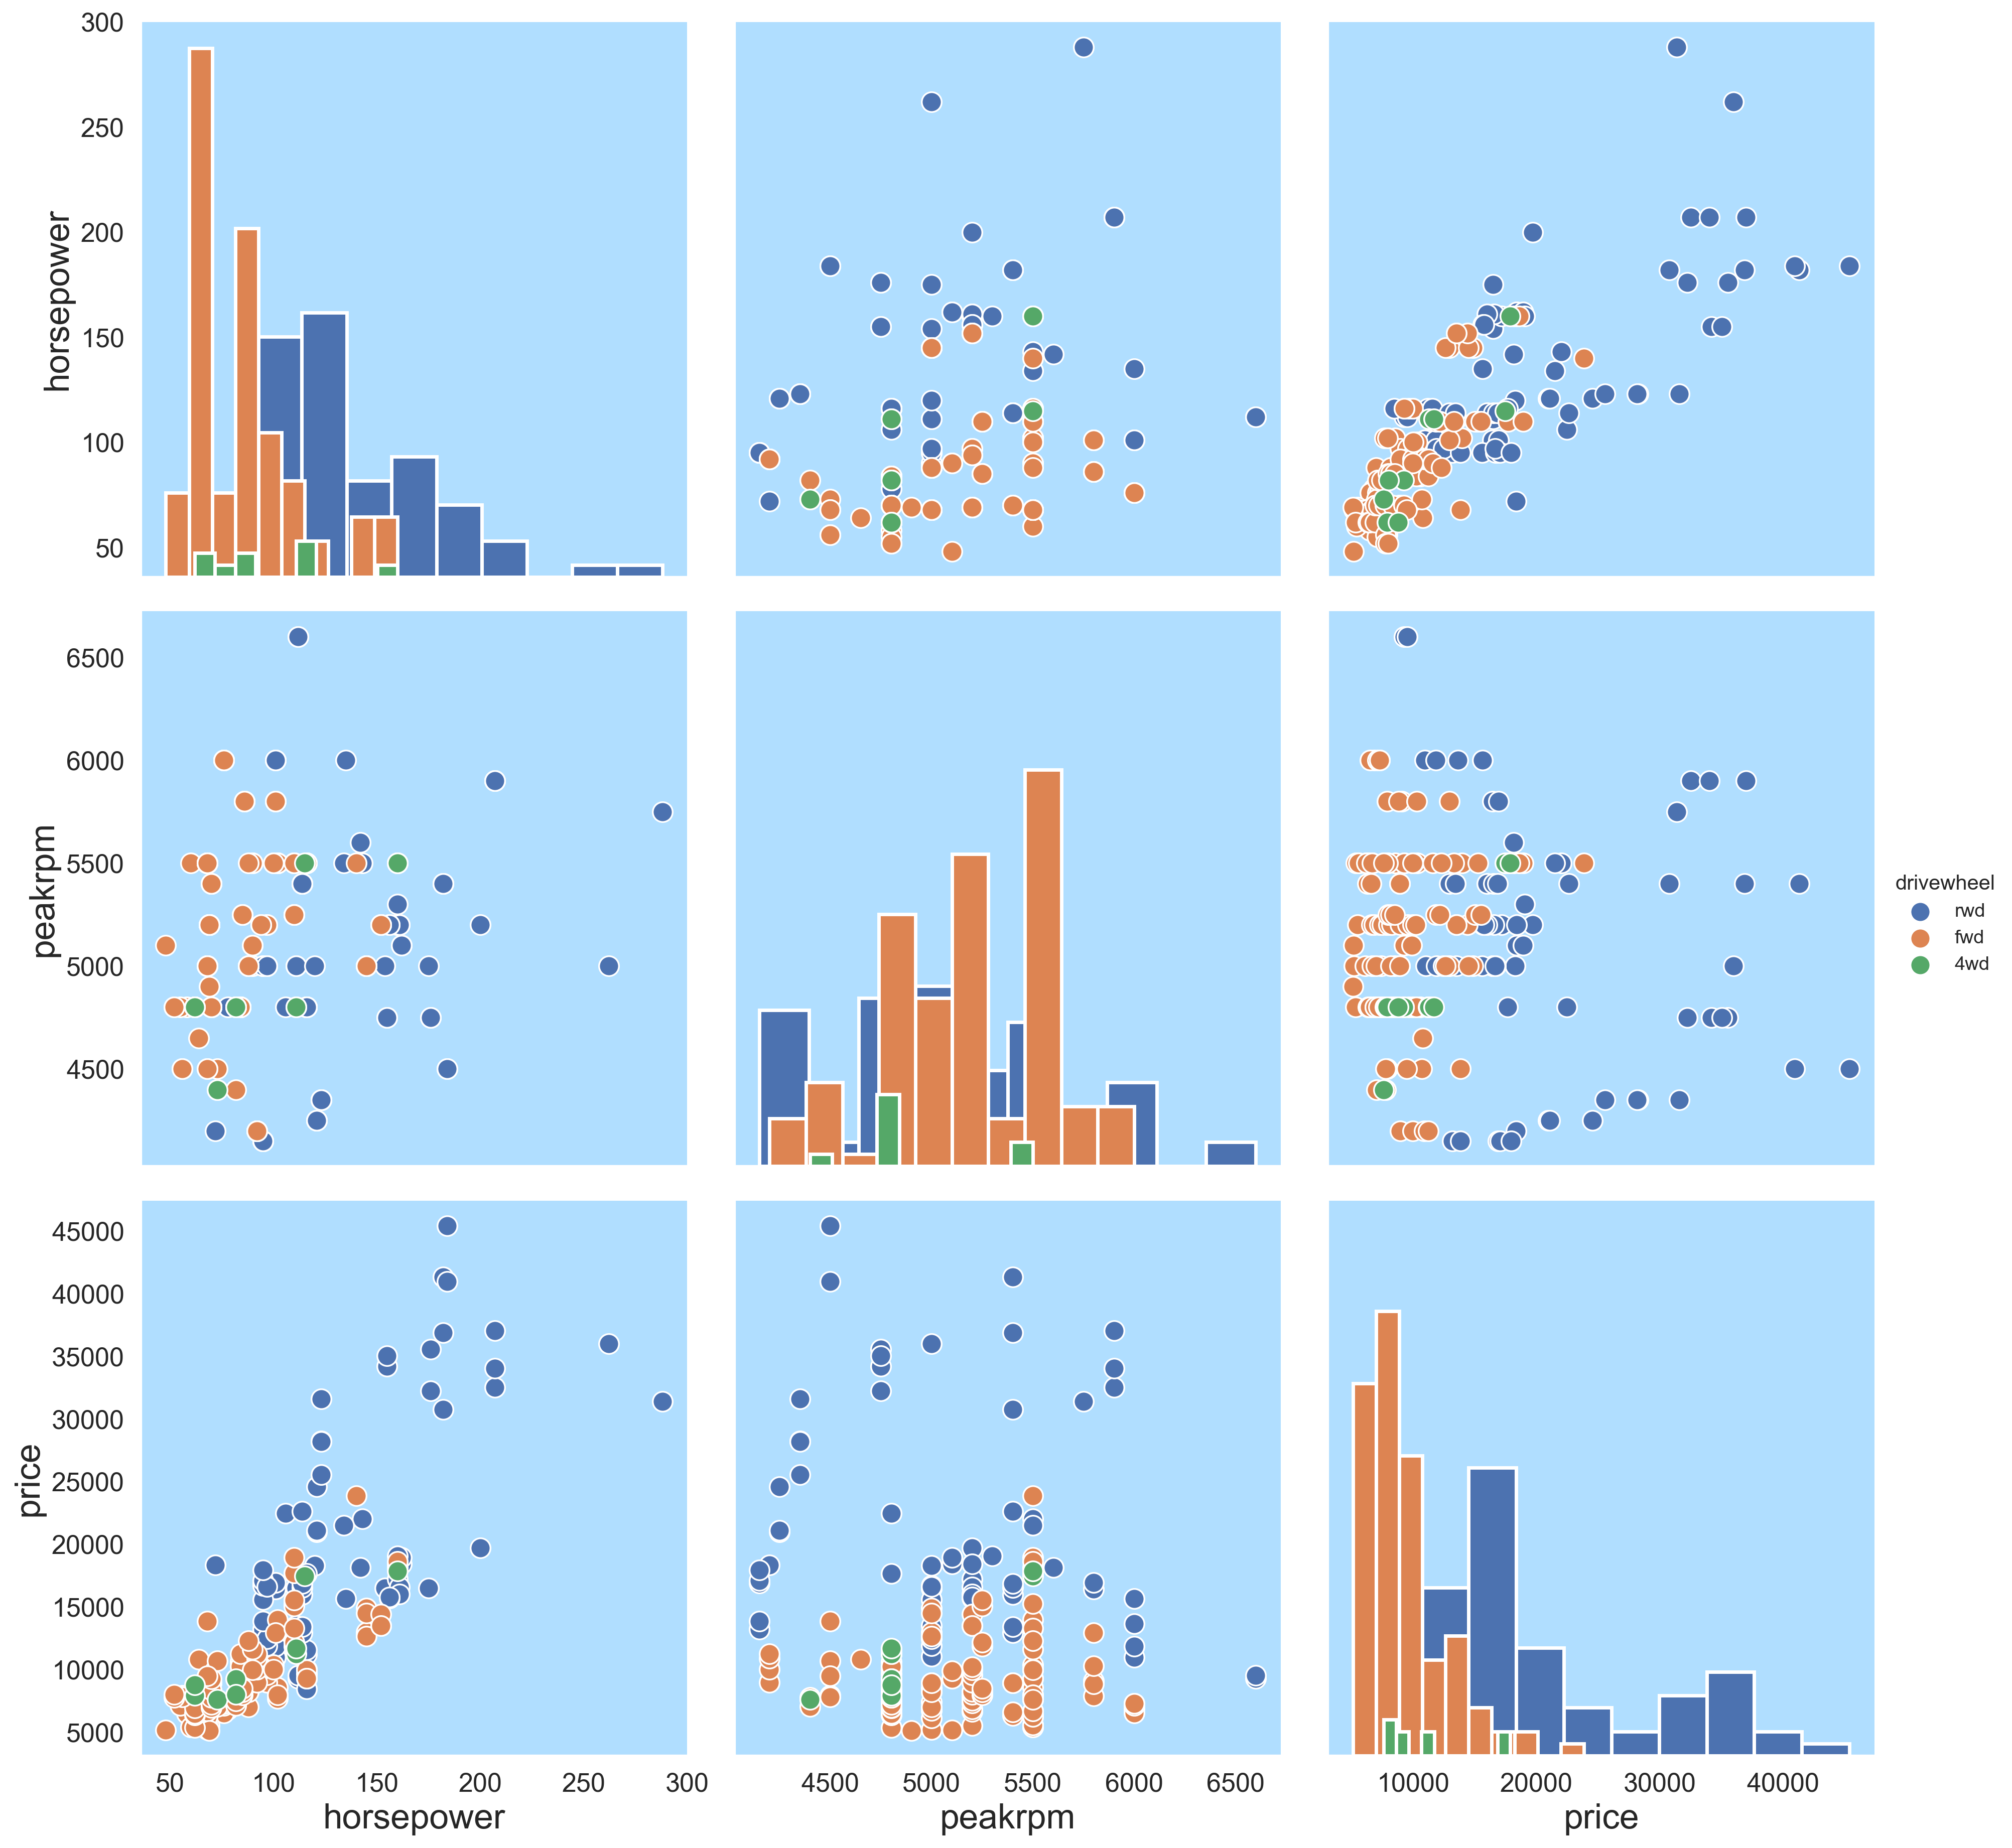

In [51]:
# Plot a subset of variables
g = sns.PairGrid(df1 , hue='drivewheel' ,vars=["horsepower","peakrpm","price"],height=5, aspect=1)
g = g.map_offdiag(plt.scatter , edgecolor="w", s=130)
g = g.map_diag(plt.hist , edgecolor ='w', linewidth=2)
g = g.add_legend()
plt.show()

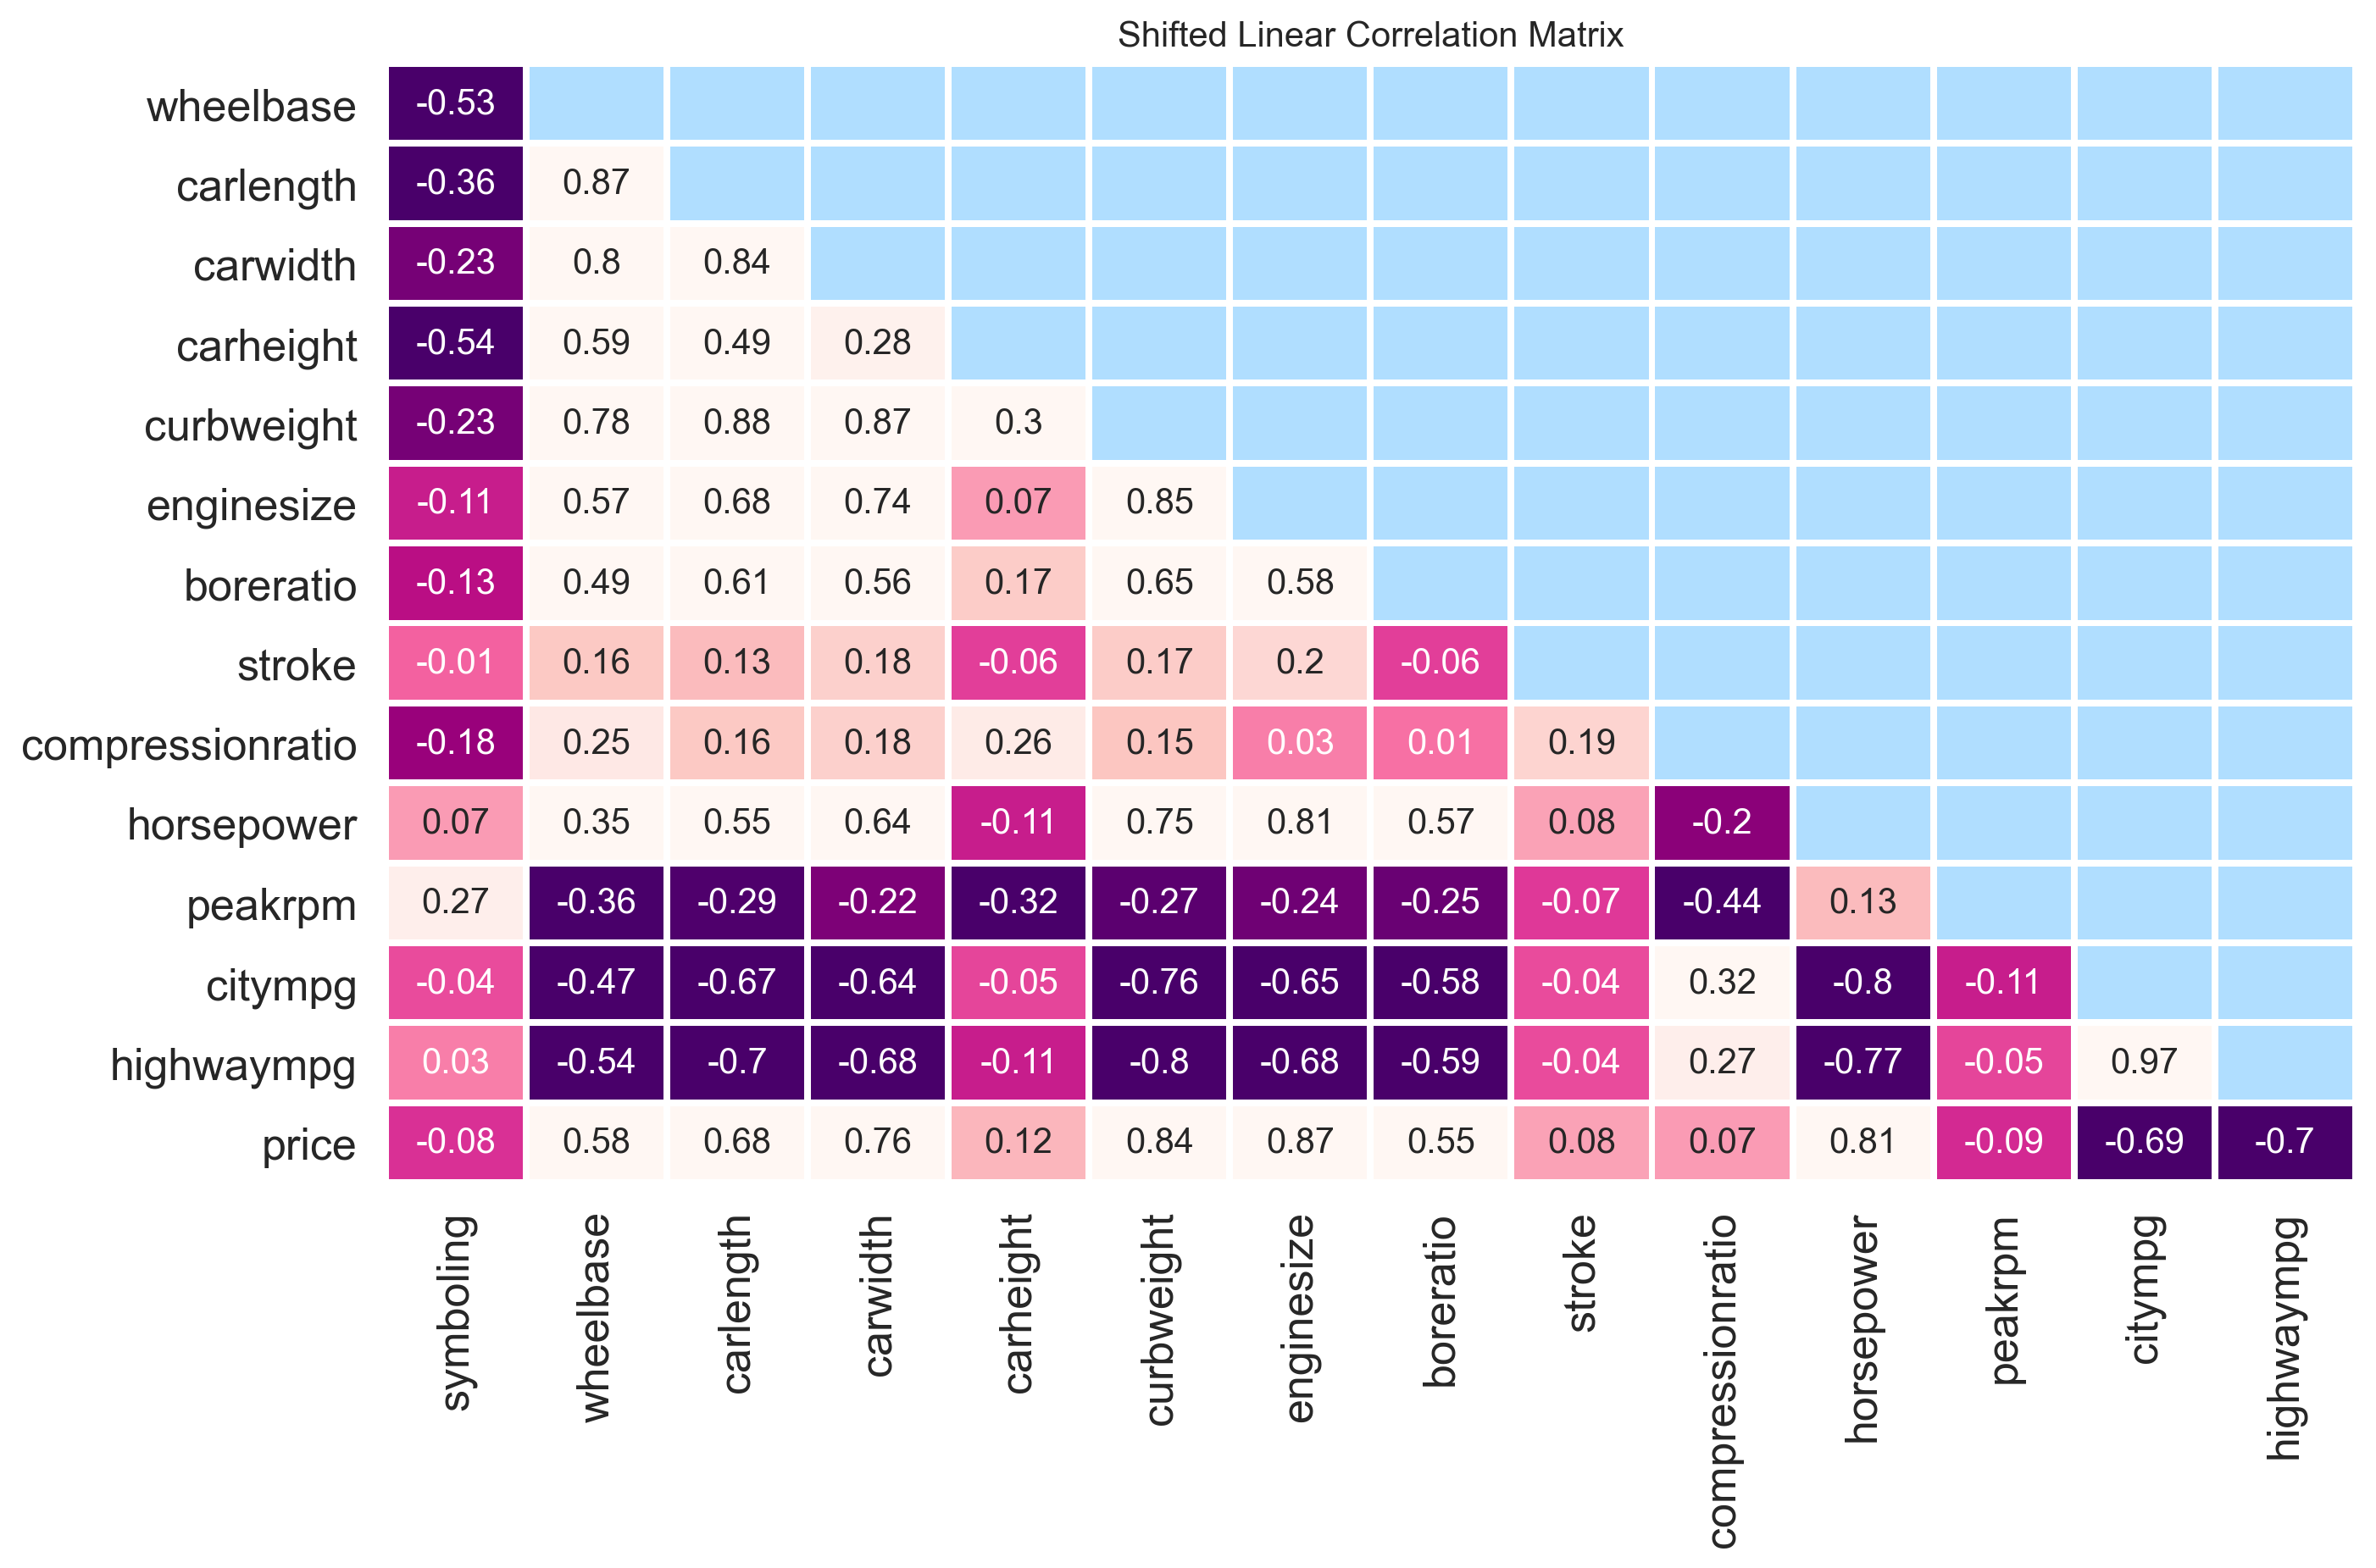

In [52]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(df)

<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Data <strong style="color:black;font-size:25px;font-family:Georgia;">Preprocessing <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

In [53]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()

In [54]:
LABEL_ENCODING("fueltype")
LABEL_ENCODING("aspiration")
LABEL_ENCODING("doornumber")
LABEL_ENCODING("carbody")
LABEL_ENCODING("drivewheel")
LABEL_ENCODING("enginelocation")
LABEL_ENCODING("enginetype")
LABEL_ENCODING("cylindernumber")
LABEL_ENCODING("fuelsystem")
df

symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         1           0           1        0           2   
1            3         1           0           1        0           2   
2            1         1           0           1        2           2   
3            2         1           0           0        3           1   
4            2         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200         -1         1           0           0        3           2   
201         -1         1           1           0        3           2   
202         -1         1           0           0        3           2   
203         -1         0           1           0        3           2   
204         -1         1           1           0        3           2   

     enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0                 0       88.6      168.8      64.1       48.8        2548   
1                 0       88.6      168.8      64.1       48.8        2548   
2                 0       94.5      171.2      65.5       52.4        2823   
3                 0       99.8      176.6      66.2       54.3        2337   
4                 0       99.4      176.6      66.4       54.3        2824   
..              ...        ...        ...       ...        ...         ...   
200               0      109.1      188.8      68.9       55.5        2952   
201               0      109.1      188.8      68.8       55.5        3049   
202               0      109.1      188.8      68.9       55.5        3012   
203               0      109.1      188.8      68.9       55.5        3217   
204               0      109.1      188.8      68.9       55.5        3062   

     enginetype  cylindernumber  enginesize  fuelsystem  boreratio  stroke  \
0             0               2         130           5       3.47    2.68   
1             0               2         130           5       3.47    2.68   
2             5               3         152           5       2.68    3.47   
3             3               2         109           5       3.19    3.40   
4             3               1         136           5       3.19    3.40   
..          ...             ...         ...         ...        ...     ...   
200           3               2         141           5       3.78    3.15   
201           3               2         141           5       3.78    3.15   
202           5               3         173           5       3.58    2.87   
203           3               3         145           3       3.01    3.40   
204           3               2         141           5       3.78    3.15   

     compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0                 9.0         111     5000       21          27  13495.0  
1                 9.0         111     5000       21          27  16500.0  
2                 9.0         154     5000       19          26  16500.0  
3                10.0         102     5500       24          30  13950.0  
4                 8.0         115     5500       18          22  17450.0  
..                ...         ...      ...      ...         ...      ...  
200               9.5         114     5400       23          28  16845.0  
201               8.7         160     5300       19          25  19045.0  
202               8.8         134     5500       18          23  21485.0  
203              23.0         106     4800       26          27  22470.0  
204               9.5         114     5400       19          25  22625.0  

[205 rows x 24 columns]

<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Feature <strong style="color:black;font-size:25px;font-family:Georgia;">Scaling <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
scaler.fit(df.drop(['price'],axis = 1))
scaled_features = scaler.transform(df.drop('price',axis = 1))

In [56]:
X = scaled_features
Y = df['price']
X= pd.DataFrame(data=X,columns = df.drop(columns=['price']).columns)

In [57]:
X.corr()

symboling  fueltype  aspiration  doornumber   carbody  \
symboling          1.000000  0.194311   -0.059866    0.664073 -0.596135   
fueltype           0.194311  1.000000   -0.401397    0.191491 -0.147853   
aspiration        -0.059866 -0.401397    1.000000   -0.031792  0.063028   
doornumber         0.664073  0.191491   -0.031792    1.000000 -0.680358   
carbody           -0.596135 -0.147853    0.063028   -0.680358  1.000000   
drivewheel        -0.041671 -0.132257    0.066465    0.098954 -0.155745   
enginelocation     0.212471  0.040070   -0.057191    0.137757 -0.277009   
wheelbase         -0.531954 -0.308346    0.257611   -0.447357  0.401362   
carlength         -0.357612 -0.212679    0.234539   -0.398568  0.334433   
carwidth          -0.232919 -0.233880    0.300567   -0.207168  0.131710   
carheight         -0.541038 -0.284631    0.087311   -0.552208  0.568534   
curbweight        -0.227691 -0.217275    0.324902   -0.197379  0.128467   
enginetype         0.050372  0.082695   -0.102963    0.062431 -0.037024   
cylindernumber     0.197762  0.110617   -0.133119    0.154322 -0.048408   
enginesize        -0.105790 -0.069594    0.108217   -0.020742 -0.073352   
fuelsystem         0.091163  0.041529    0.288086    0.015519 -0.065079   
boreratio         -0.130051 -0.054451    0.212614   -0.119258  0.010549   
stroke            -0.008735 -0.241829    0.222982    0.011082 -0.015325   
compressionratio  -0.178515 -0.984356    0.295541   -0.177888  0.136243   
horsepower         0.070873  0.163926    0.241685    0.126947 -0.153928   
peakrpm            0.273606  0.476883   -0.183383    0.247668 -0.109643   
citympg           -0.035823 -0.255963   -0.202362    0.012417  0.031697   
highwaympg         0.034606 -0.191392   -0.254416    0.036330 -0.007170   

                  drivewheel  enginelocation  wheelbase  carlength  carwidth  \
symboling          -0.041671        0.212471  -0.531954  -0.357612 -0.232919   
fueltype           -0.132257        0.040070  -0.308346  -0.212679 -0.233880   
aspiration          0.066465       -0.057191   0.257611   0.234539  0.300567   
doornumber          0.098954        0.137757  -0.447357  -0.398568 -0.207168   
carbody            -0.155745       -0.277009   0.401362   0.334433  0.131710   
drivewheel          1.000000        0.147865   0.459745   0.485649  0.470751   
enginelocation      0.147865        1.000000  -0.187790  -0.050989 -0.051698   
wheelbase           0.459745       -0.187790   1.000000   0.874587  0.795144   
carlength           0.485649       -0.050989   0.874587   1.000000  0.841118   
carwidth            0.470751       -0.051698   0.795144   0.841118  1.000000   
carheight          -0.019719       -0.106234   0.589435   0.491029  0.279210   
curbweight          0.575111        0.050468   0.776386   0.877728  0.867032   
enginetype         -0.116823        0.114127  -0.135577  -0.113291  0.012298   
cylindernumber      0.223238        0.135541  -0.184596  -0.109585 -0.194074   
enginesize          0.524307        0.196826   0.569329   0.683360  0.735433   
fuelsystem          0.424686        0.105971   0.384601   0.557810  0.521434   
boreratio           0.481827        0.185042   0.488750   0.606454  0.559150   
stroke              0.071591       -0.138455   0.160959   0.129533  0.182942   
compressionratio    0.127479       -0.019762   0.249786   0.158414  0.181129   
horsepower          0.518686        0.317839   0.353294   0.552623  0.640732   
peakrpm            -0.039417        0.198461  -0.360469  -0.287242 -0.220012   
citympg            -0.449581       -0.153487  -0.470414  -0.670909 -0.642704   
highwaympg         -0.452220       -0.102026  -0.544082  -0.704662 -0.677218   

                  carheight  curbweight  enginetype  cylindernumber  \
symboling         -0.541038   -0.227691    0.050372        0.197762   
fueltype          -0.284631   -0.217275    0.082695        0.110617   
aspiration         0.087311    0.324902   -0.102963       -0.133119   
doornumber  

In [58]:
## pair of independent ariables with correlation greater than 0.5 
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['symboling', 'doornumber'],
  ['doornumber', 'symboling'],
  ['carbody', 'carheight'],
  ['drivewheel', 'curbweight'],
  ['drivewheel', 'enginesize'],
  ['drivewheel', 'horsepower'],
  ['wheelbase', 'carlength'],
  ['wheelbase', 'carwidth'],
  ['wheelbase', 'carheight'],
  ['wheelbase', 'curbweight'],
  ['wheelbase', 'enginesize'],
  ['carlength', 'wheelbase'],
  ['carlength', 'carwidth'],
  ['carlength', 'curbweight'],
  ['carlength', 'enginesize'],
  ['carlength', 'fuelsystem'],
  ['carlength', 'boreratio'],
  ['carlength', 'horsepower'],
  ['carwidth', 'wheelbase'],
  ['carwidth', 'carlength'],
  ['carwidth', 'curbweight'],
  ['carwidth', 'enginesize'],
  ['carwidth', 'fuelsystem'],
  ['carwidth', 'boreratio'],
  ['carwidth', 'horsepower'],
  ['carheight', 'carbody'],
  ['carheight', 'wheelbase'],
  ['curbweight', 'drivewheel'],
  ['curbweight', 'wheelbase'],
  ['curbweight', 'carlength'],
  ['curbweight', 'carwidth'],
  ['curbweight', 'enginesize'],
  ['curbweight', 'fuelsystem'

## Calculating variance inflation factor

In [59]:
#importing varience inflation factor from the stats model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X
## calculating VIF for every column
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

symboling            2.818795
fueltype            96.896321
aspiration           3.301326
doornumber           2.838657
carbody              2.786743
drivewheel           2.558937
enginelocation       1.743238
wheelbase           10.888297
carlength           11.798256
carwidth             8.935914
carheight            3.063991
curbweight          19.074105
enginetype           1.612369
cylindernumber       2.251293
enginesize          13.729257
fuelsystem           2.413984
boreratio            2.296375
stroke               1.584189
compressionratio    88.926493
horsepower          15.365644
peakrpm              2.675025
citympg             32.812012
highwaympg          28.305212
dtype: float64

## Treating Multicollinearity

In [60]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [61]:
for i in range(10):
    vif_data=MC_remover(vif_data)
vif_data.head()

fueltype has been removed
citympg has been removed
curbweight has been removed
horsepower has been removed
carlength has been removed
wheelbase has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


symboling  aspiration  doornumber   carbody  drivewheel  enginelocation  \
0   1.743470   -0.469295    1.130388 -3.050975    1.213330       -0.121867   
1   1.743470   -0.469295    1.130388 -3.050975    1.213330       -0.121867   
2   0.133509   -0.469295    1.130388 -0.717207    1.213330       -0.121867   
3   0.938490   -0.469295   -0.884652  0.449677   -0.589081       -0.121867   
4   0.938490   -0.469295   -0.884652  0.449677   -2.391492       -0.121867   

   carwidth  carheight  enginetype  cylindernumber  enginesize  fuelsystem  \
0 -0.844782  -2.020417   -2.865105       -0.147475    0.074449    0.869568   
1 -0.844782  -2.020417   -2.865105       -0.147475    0.074449    0.869568   
2 -0.190566  -0.543527    1.886890        1.112210    0.604046    0.869568   
3  0.136542   0.235942   -0.013908       -0.147475   -0.431076    0.869568   
4  0.230001   0.235942   -0.013908       -1.407161    0.218885    0.869568   

   boreratio    stroke  compressionratio   peakrpm  highwaympg  
0   0.519071 -1.839377         -0.288349 -0.262960   -0.546059  
1   0.519071 -1.839377         -0.288349 -0.262960   -0.546059  
2  -2.404880  0.685946         -0.288349 -0.262960   -0.691627  
3  -0.517266  0.462183         -0.035973  0.787855   -0.109354  
4  -0.517266  0.462183         -0.540725  0.787855   -1.273900

In [62]:
## calculating VIF for remaining columns
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(vif_data.columns)

(symboling           2.349239
 aspiration          1.659280
 doornumber          2.611613
 carbody             2.622162
 drivewheel          2.185071
 enginelocation      1.566749
 carwidth            4.207147
 carheight           2.237317
 enginetype          1.266421
 cylindernumber      1.670674
 enginesize          4.267818
 fuelsystem          2.034207
 boreratio           2.178579
 stroke              1.276295
 compressionratio    2.243753
 peakrpm             1.958028
 highwaympg          4.775559
 dtype: float64,
 17)

<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Feature <strong style="color:black;font-size:25px;font-family:Georgia;">Selection <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

In [63]:
from sklearn.model_selection import train_test_split
X = vif_data
Y = df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Modeling and Prediction <strong style="color:black;font-size:25px;font-family:Georgia;">using Linear Regression <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

 ### Linear regression:-
Linear regression performs to predict a dependent variable(y) based on a given independent variable(x).

So, this regression technique finds out a linear relationship between x and y.

linear regression in a statistical way that is used for predictive analysis.

Linear regression makes predictions for continuous/real or numeric variables 
such as sales, salary, age, product price, etc..

it shows the linear relationship which means it finds how the value of the dependent variable 
is changing according to the value of the independent variable.

The linear regression model provides a sloped straight line representing the relationship between the variables.


<img src="https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png" width="300px">







Linear Regression in Mathematically, we can represent as:

### y= a0+a1x+ε

Y= Dependent Variable (Target Variable)

X= Independent Variable (predictor Variable)

a0= intercept of the line

a1 = Linear regression coefficient

ε = random error

#### to find the a1 value we are using  least square method(slope of the estimated regression)
 
 ##### formula:-
 a1=m , a0=c
<img src="https://i.stack.imgur.com/OjlaY.png" width="300px">

### Types of Linear Regression

Linear regression can be divided into two types of the algorithm:

##### Simple Linear Regression:
If a single independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Simple Linear Regression.

##### Multiple Linear regression:
If more than one independent variables is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.

### Linear Regression Line
A linear line showing the relationship between the dependent and independent variables is called a regression line. A regression line can show two types of relationship:

##### Positive Linear Relationship:
If the dependent variable increases on the Y-axis and independent variable increases on X-axis, then such a relationship is termed as a Positive linear relationship.


##### Negative Linear Relationship:
If the dependent variable decreases on the Y-axis and independent variable increases on the X-axis, then such a relationship is called a negative linear relationship.

<img src="https://datalabbd.com/wp-content/uploads/2019/06/12b.png" width="600px">

## Finding the best fit line:
When working with linear regression, our main goal is to find the best fit line
that means the error between predicted values and actual values should be minimized.

The best fit line will have the least error.

#### when cost function is used:

The different values for weights or the coefficient of lines (a0, a1) gives a different line of regression,

so we need to calculate the best values for a0 and a1 to find the best fit line, so to calculate this we use cost function.

### Cost function(mean square error):-

The different values for weights or coefficient of lines (a0, a1) gives the different line of regression,and the cost function is used to estimate the values of the coefficient for the best fit line.

It measures how a linear regression model is performing.

We can use the cost function to find the accuracy of the mapping function, which maps the input variable to the output variable.

This mapping function is also known as Hypothesis function.

For Linear Regression, we use the Mean Squared Error (MSE) cost function, 
which is the average of squared error occurred between the predicted values and actual values.

<img src="https://datavedas.com/wp-content/uploads/2018/04/image003-1.png" width="300px">

N=Total number of observation

Yi = Actual value

(a1xi+a0)= Predicted value.

##### Residuals: 
The distance between the actual value and predicted values is called residual.

#### Gradient Descent:
Gradient descent is used to minimize the MSE by calculating the gradient of the cost function

A regression model uses gradient descent to update the coefficients of the line by reducing the cost function.

It is done by a random selection of values of coefficient and then iteratively update the values to reach the minimum cost function.


<img src="https://miro.medium.com/max/1838/1*HrFZV7pKPcc5dzLaWvngtQ.png" width="700px">


### R-squared method:


<img src="https://cdn.rapidinsight.com/wp-content/uploads/2019/11/r-squared.png" width="700px">


R-squared is a statistical method that determines the goodness of fit.

It measures the strength of the relationship between the dependent and independent variables on a scale of 0-1.
when the scale is negative then it comes under worst model.

The high value of R-square determines the less difference between the predicted values and actual values and hence represents a good model.

It is also called a coefficient of determination, or coefficient of multiple determination for multiple regression.

In [64]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(normalize =True)
reg.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [65]:
reg.coef_

array([ 527.20758933, 1040.57979525, -489.54956218, -483.67472919,
       1317.13029568, 1240.34871277, 1113.22444377, 1044.18219213,
        444.43314784, -132.86057778, 5173.40020184, -353.64680427,
       -807.1491029 , -858.0199379 ,  636.7709272 ,  816.77944608,
       -924.0168884 ])

The coefficient estimates for Ordinary Least Squares rely on the independence of the features. When features are correlated and the columns of the design matrix  have an approximately linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

In [66]:
pred = reg.predict(X_test)
pred

array([24511.59649828,  7744.69188939,  8697.91093722, 11456.55125804,
        9020.27677   , 18008.12313943,  7754.97809251, 11159.0637268 ,
       10266.762453  ,  9930.95310674, 15112.97675814,  6713.91440291,
       12254.29590838, 21409.97020648, 13799.32725334,  8553.07092156,
        9015.57645675, 11138.64637431, 10831.46936542, 27392.3745555 ,
        8701.66828094, 34495.80380255,  8602.02727582, 17436.42292627,
       15831.80820236,  5727.83399452, 16980.06609146, 11602.48118403,
       11700.09089406, 21409.97020648,  8844.18304833,  6862.45128424,
        9805.75956818, 17879.33139342, 20357.07517116, 40695.8631123 ,
       14715.01661705, 17223.9126049 ,  5450.46415484, 12414.80820263,
        6839.57734626, 27392.3745555 , 23381.1667765 ,  6990.54360672,
        5599.50221738,  8165.98364422,  9521.17947923, 20212.9948417 ,
        8958.64078994,  9521.17947923,  7180.29949449, 18391.70760172,
        5037.43217815, 27867.20817508, 20041.55629587, 26877.40264257,
      

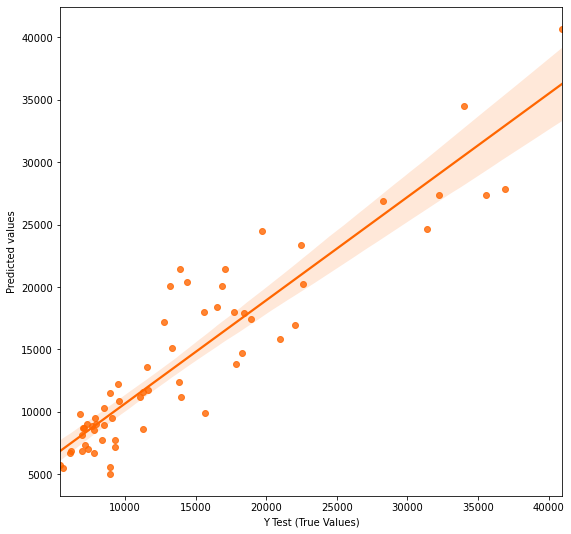

In [67]:
# Recover default matplotlib settings
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x = Y_test,y = pred, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [68]:
reg.score(X_test,Y_test)

0.8526975573699157

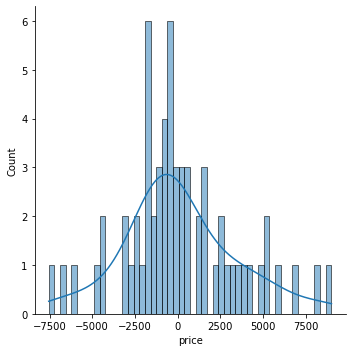

In [69]:
sns.displot(Y_test-pred,bins = 50,kde = True)
plt.show()

In [70]:
cdf = pd.DataFrame(reg.coef_,X.columns,columns = ['coef'])
cdf

coef
symboling          527.207589
aspiration        1040.579795
doornumber        -489.549562
carbody           -483.674729
drivewheel        1317.130296
enginelocation    1240.348713
carwidth          1113.224444
carheight         1044.182192
enginetype         444.433148
cylindernumber    -132.860578
enginesize        5173.400202
fuelsystem        -353.646804
boreratio         -807.149103
stroke            -858.019938
compressionratio   636.770927
peakrpm            816.779446
highwaympg        -924.016888

<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Model <strong style="color:black;font-size:25px;font-family:Georgia;">Coefficients <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

In [71]:
coefficients_table=pd.DataFrame({'column':X_train.columns,
                                'coefficients':reg.coef_})
coefficients_table=coefficients_table.sort_values(by="coefficients")

Text(0.5, 1.0, 'Normalized coefficients')

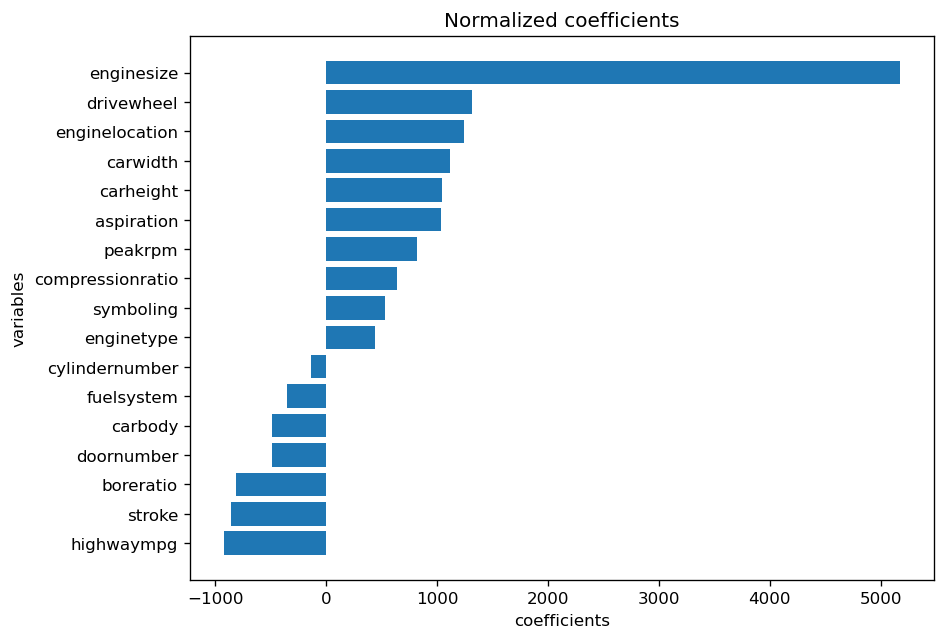

In [72]:
plt.figure(figsize=(8,6),dpi=120)
x=coefficients_table['column']
y=coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel("coefficients")
plt.ylabel("variables")
plt.title("Normalized coefficients")

<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Modeling and Prediction <strong style="color:black;font-size:25px;font-family:Georgia;">using XGBoost Regression <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

Shortly after its development and initial release, XGBoost became the go-to method and often the key component in winning solutions for a range of problems in machine learning competitions.

Regression predictive modeling problems involve predicting a numerical value such as a dollar amount or a height. XGBoost can be used directly for regression predictive modeling.

Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

You can specify hyperparameter values to the class constructor to configure the model.

Perhaps the most commonly configured hyperparameters are the following:

1. n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.
2. max_depth: The maximum depth of each tree, often values are between 1 and 10.
3. eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.
4. subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.
5. colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

In [73]:
import xgboost as xg
# create an xgboost regression model
model = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

Good hyperparameter values can be found by trial and error for a given dataset, or systematic experimentation such as using a grid search across a range of values.

Randomness is used in the construction of the model. This means that each time the algorithm is run on the same data, it may produce a slightly different model.

When using machine learning algorithms that have a stochastic learning algorithm, it is good practice to evaluate them by averaging their performance across multiple runs or repeats of cross-validation. When fitting a final model, it may be desirable to either increase the number of trees until the variance of the model is reduced across repeated evaluations, or to fit multiple final models and average their predictions.

In [74]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print(model.score(X_test, Y_test))

0.9254422664193949


<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Modeling and Prediction <strong style="color:black;font-size:25px;font-family:Georgia;">using Ridge Regression <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients.

The complexity parameter <strong> alpha>/0 </strong> controls the amount of shrinkage: the larger the value of , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

In [75]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
R=Ridge(alpha=0.1)
R.fit(X_train,Y_train)
y_pred1=R.predict(X_test)

In [76]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score",r2_score(Y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred1)))

R2 score 0.8529056375717394
RMSE 3273.888213899565


<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Modeling and Prediction <strong style="color:black;font-size:25px;font-family:Georgia;">using Lasso Regression <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason, Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients

In [77]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, Y_train) 
pred_test_lasso= model_lasso.predict(X_test)
print("RMSE",np.sqrt(mean_squared_error(Y_test,pred_test_lasso))) 
print("R2 score",r2_score(Y_test, pred_test_lasso))

RMSE 3275.812405017551
R2 score 0.8527326806328942


<h1 style="color:#fce444;font-size:30px;font-family:Georgia;text-align:center;"><strong>✏️Modeling and Prediction <strong style="color:black;font-size:25px;font-family:Georgia;">using Elastic Regression <strong style="color:#fce444;font-size:25px;font-family:Georgia;"><strong style="color:black;font-size:30px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

ElasticNet is a linear regression model trained with both l1 and l2-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of l1 and l2 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features that are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

In [78]:
model_enet = ElasticNet(alpha = 0.1)
model_enet.fit(X_train, Y_train) 
pred_test_enet= model_enet.predict(X_test)
print("RMSE",np.sqrt(mean_squared_error(Y_test,pred_test_enet)))
print("R2 score",r2_score(Y_test, pred_test_enet))

RMSE 3202.649121136947
R2 score 0.8592374725658745


# Regularization Techniques

* Linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, it can lead to model over-fitting on the training dataset. Such a model will not generalize well on the unseen data. To overcome this shortcoming, we do regularization which penalizes large coefficients. The following are the regularization algorithms.

#### Pros of Regularization

--> We can use a regularized model to reduce the dimensionality of the training dataset. Dimensionality reduction is important because of three main reasons:

--> Prevents Overfitting: A high-dimensional dataset having too many features can sometimes lead to overfitting (model captures both real and random effects).

--> Simplicity: An over-complex model having too many features can be hard to interpret especially when features are correlated with each other.

--> Computational Efficiency: A model trained on a lower dimensional dataset is computationally efficient (execution of algorithm requires less computational time).


#### Cons of Regularization

--> Regularization leads to dimensionality reduction, which means the machine learning model is built using a lower dimensional dataset. This generally leads to a high bias errror.

--> If regularization is performed before training the model, a perfect balance between bias-variance tradeoff must be used.

## 1) Ridge Regression

* Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

     #### Loss function = OLS + alpha * summation (squared coefficient values)


* In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

* A general linear or polynomial regression will fail if there is high collinearity between the independent variables, so to solve such problems, Ridge regression can be used.
* It helps to solve the problems if we have more parameters than samples.

#### Pros

--> Avoids overfitting a model.

--> The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.


#### Cons

--> They include all the predictors in the final model.

--> They are unable to perform feature selection.

--> They shrink the coefficients towards zero.

--> They trade the variance for bias.

## 2) Lasso Regression

* Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

* The loss function for Lasso Regression can be expressed as below:

     #### Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)
     

* In the above loss function, alpha is the penalty parameter we need to select. Using an l1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.
* Since it takes absolute values, hence, it can shrink the slope to 0, whereas Ridge Regression can only shrink it near to 0.

#### Pros
--> Select features, by shrinking co-efficient towards zero.

--> Avoids over fitting


#### Cons
--> Selected features will be highly biased.

--> For n<<p (n-number of data points, p-number of features), LASSO selects at most n features.

--> LASSO will select only one feature from a group of correlated features, the selection is arbitrary in nature.

--> For different boot strapped data, the feature selected can be very different.

--> Prediction performance is worse than Ridge regression.



## 3) ElasticNet Regression

* ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

#### Key Difference between Ridge Regression and Lasso Regression
* Ridge regression is mostly used to reduce the overfitting in the model, and it includes all the features present in the model. It reduces the complexity of the model by shrinking the coefficients.
* Lasso regression helps to reduce the overfitting in the model as well as feature selection.


#### Pros
--> Doesn’t have the problem of selecting more than n predictors when n<<p, whereas LASSO saturates when n<<p.

#### Cons
--> Computationally more expensive than LASSO or Ridge.



## References:

1. seaborn tutorial: https://www.kaggle.com/gaganmaahi224/seaborn-tutorial-17-plots
2. Linear Regression Reference : https://www.kaggle.com/rajeshwarraothota/car-price-prediction-using-linear-regression